In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import netCDF4
import sys
import point_run_tools as prt
from itertools import combinations
import subprocess
import warnings
import math
cwd = os.getcwd()
print(os.getcwd())
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16}) 
c_loc = '../../' # change if location relative to C folder is moved
b_loc = './../../' #change if location to relative bash foler is moved

/Users/mworden/Downloads/CARDAMOM_2.1-2.6c-main/PYTHON/Point_Run_Tutorial


## Compile CARDAMOM C files into executables (compile errors: 0 required to continue)

In [2]:
exitcode_compile = subprocess.run([b_loc+'BASH/CARDAMOM_COMPILE.sh'], capture_output=True)
print(" ".join(exitcode_compile.args),"\n")
print("CARDAMOM compile errors:",exitcode_compile.returncode,"\n","".join(exitcode_compile.stderr.decode("utf-8")),"\n")

./../../BASH/CARDAMOM_COMPILE.sh 

CARDAMOM compile errors: 0 
  



## Choose Site File; Check DALEC Drivers and Assimilated Data

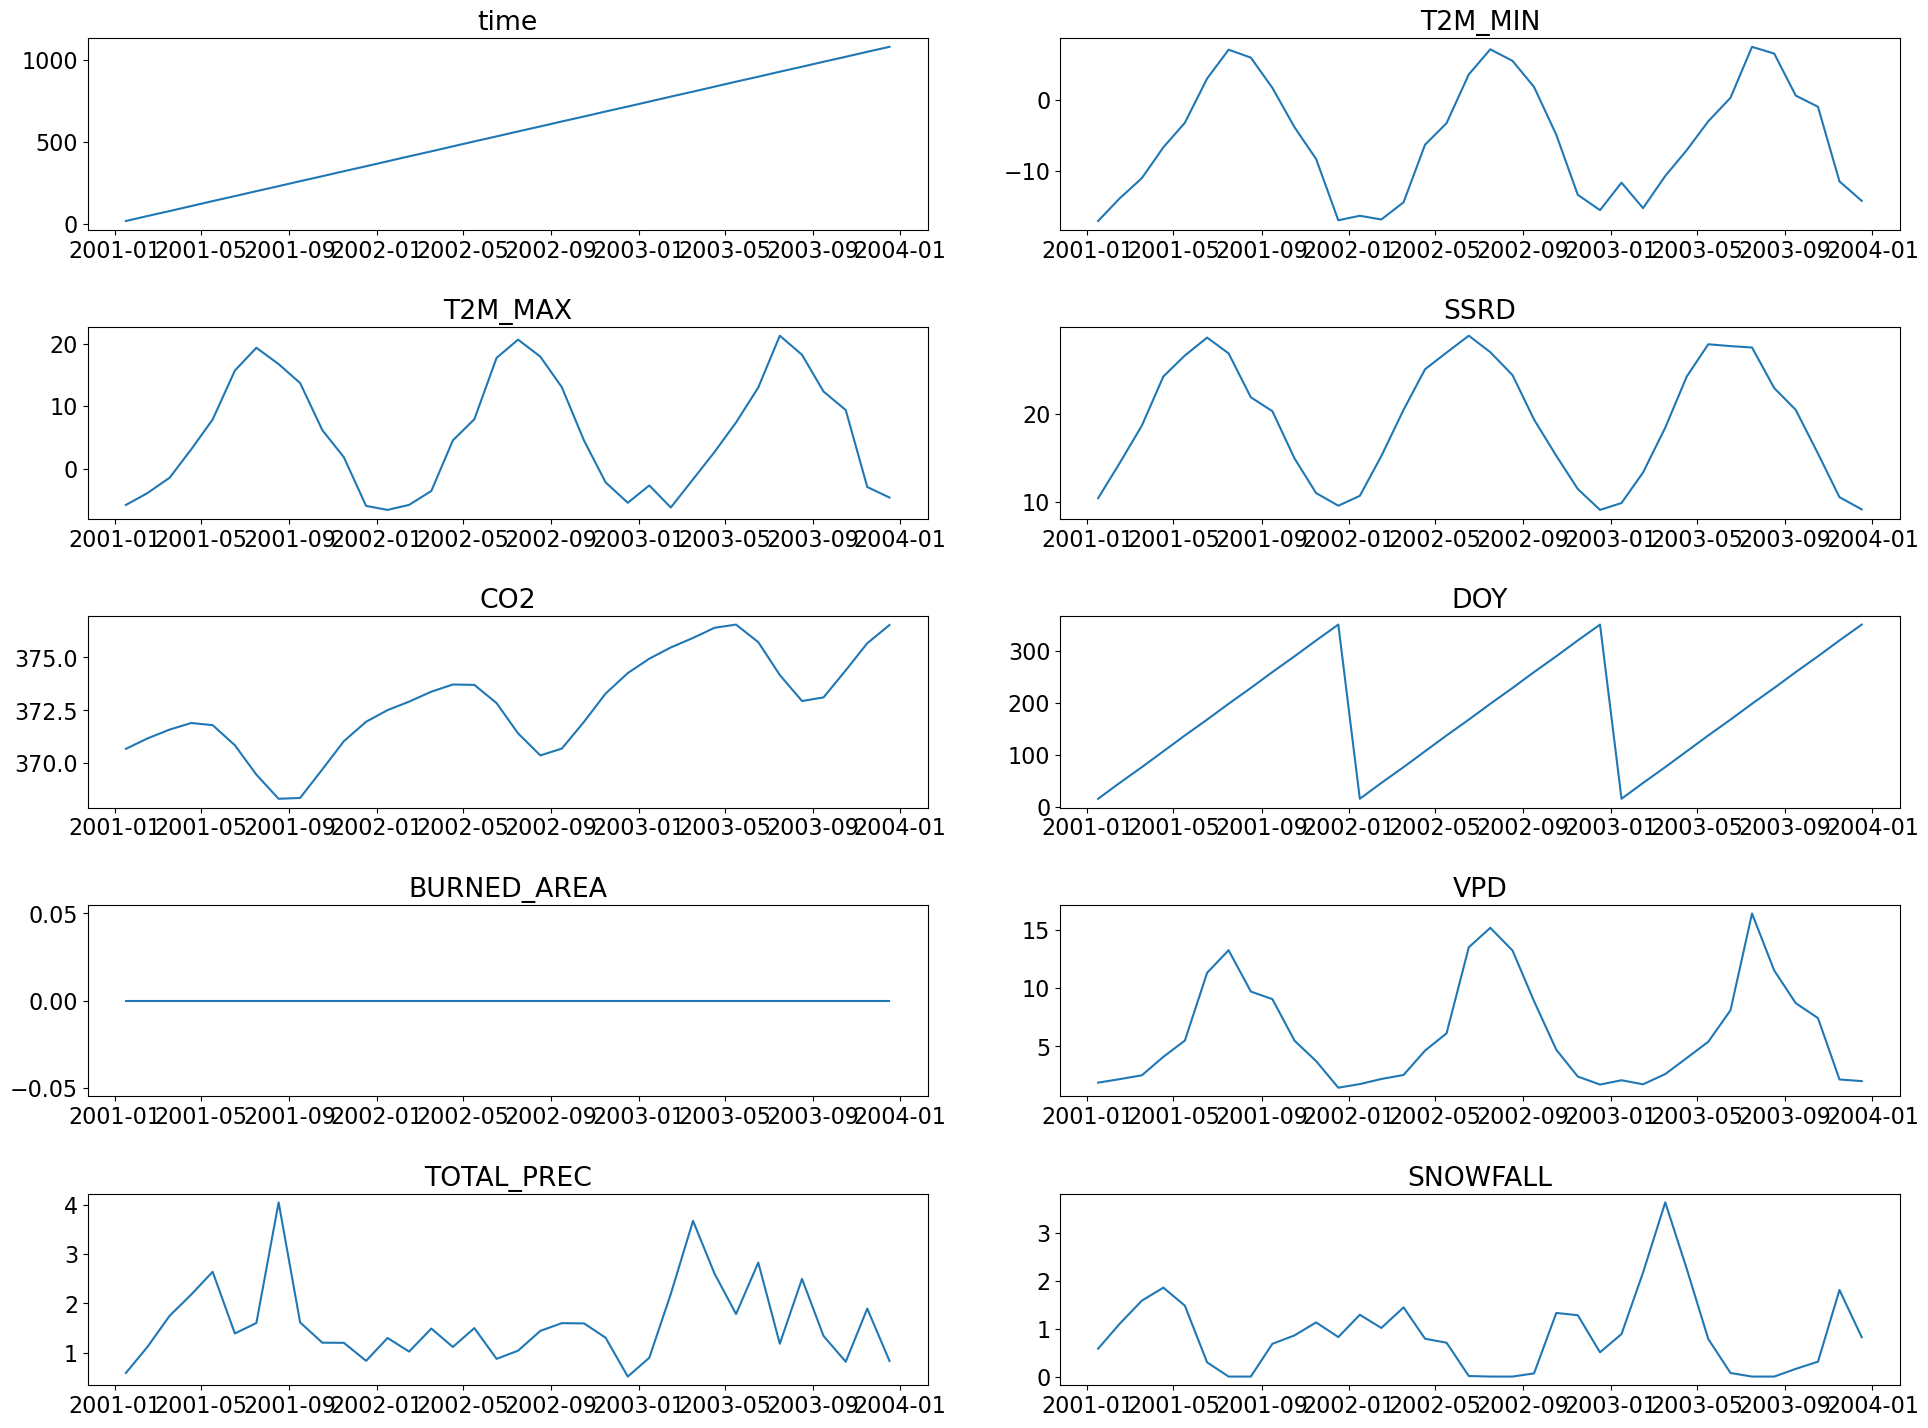

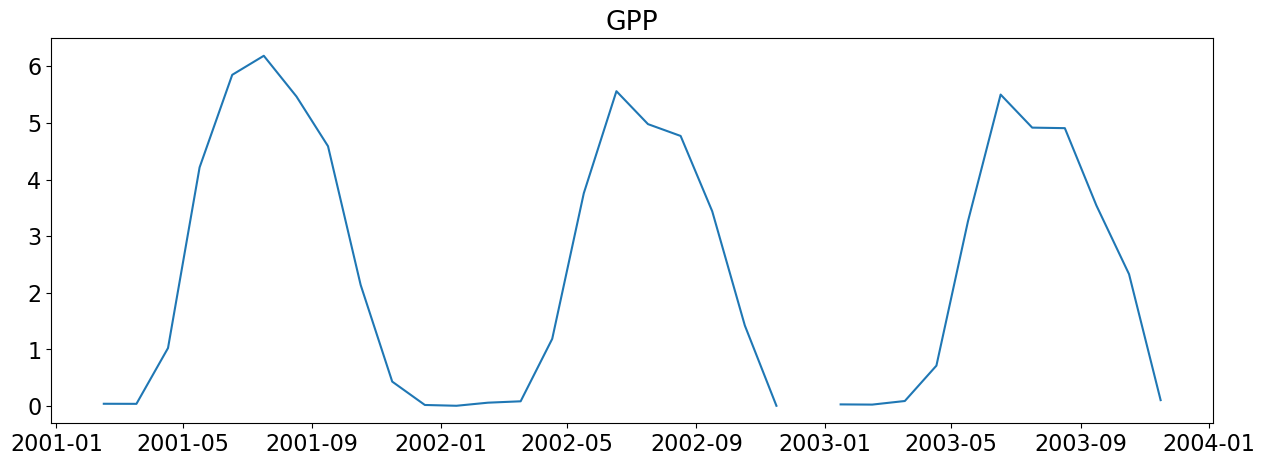

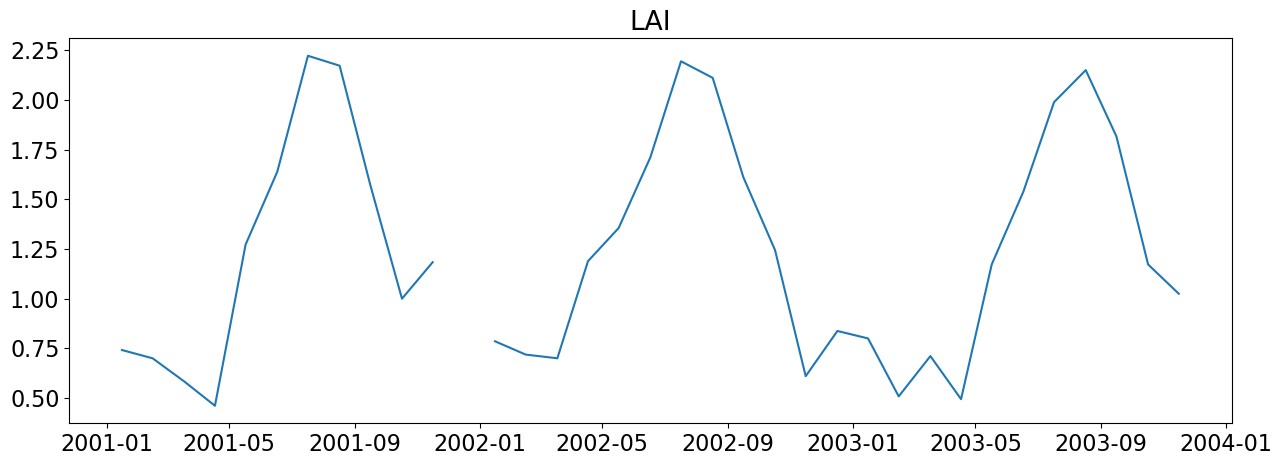

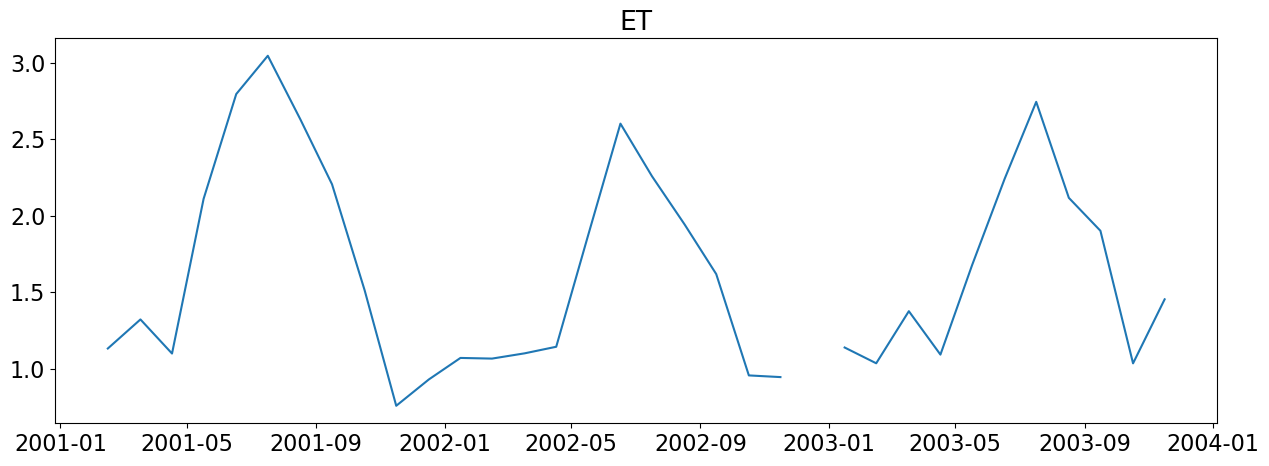

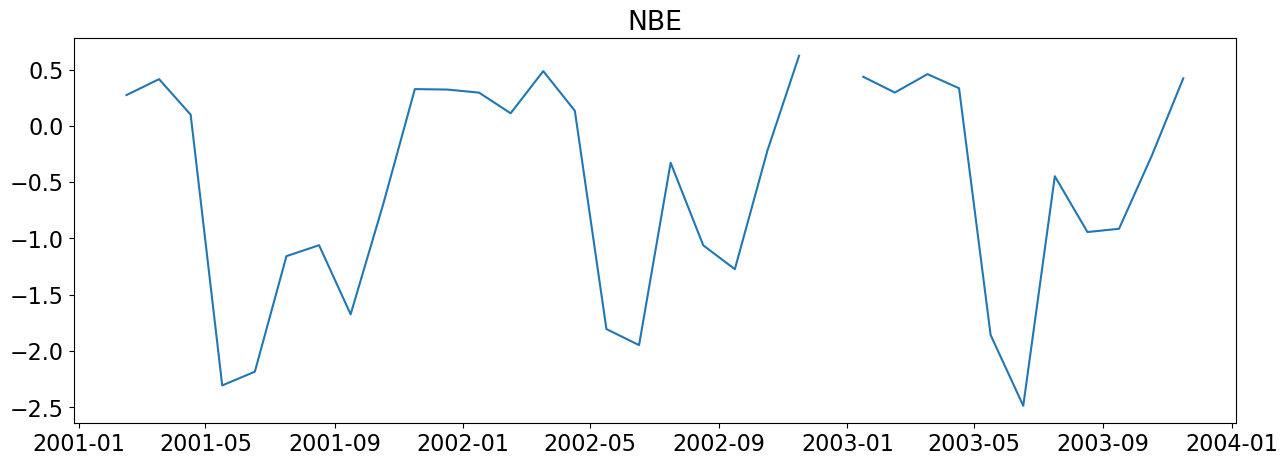

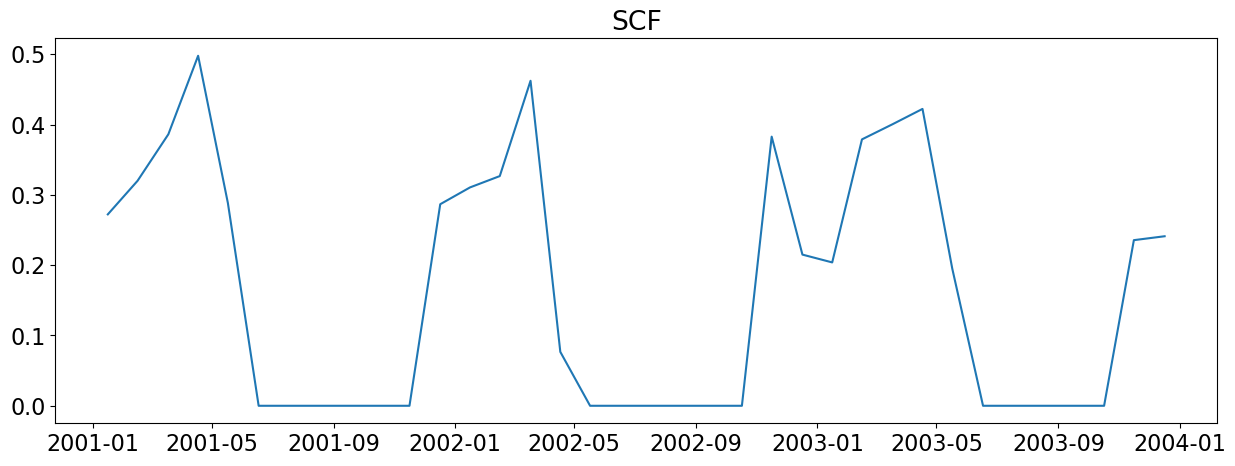

In [2]:
#model input file (change input file for different point)
cbffile = "fluxval_US-NR1_1100_ABGB_ET_GPP_mLAI_NBE_SCF_SOM_SHORT_REDUCED_UNC.cbf.nc"
cbf = netCDF4.Dataset(cbffile,'r')

dates = prt.get_dates(cbf['time'][:])

#Check Model Drivers (Requires a value at every timestep even if 0)
drivers= ['time','T2M_MIN','T2M_MAX','SSRD','CO2','DOY','BURNED_AREA','VPD','TOTAL_PREC',"SNOWFALL"]
f, axs = plt.subplots(5,2,figsize=(20,15))
f.tight_layout(pad=2.5)
for i in range(1,len(drivers)+1):
    if( drivers[i-1] in cbf.variables.keys()):
        plt.subplot(5,2,i)
        plt.title(drivers[i-1])
        plt.plot(dates,cbf[drivers[i-1]][:])
        
#Check Assimilated data (Missing values allowed)
assim = prt.assim_data_info(c_loc,int(cbf["ID"][:]))
for i in range(0,len(assim)):
    if( assim[i] in cbf.variables.keys()):
        assim_data = prt.rm99(cbf[assim[i]][:])
        if(np.sum(~np.isnan(assim_data)) < len(assim_data)/10):
            plt.figure(figsize = (15,5))
            plt.title(assim[i])
            plt.scatter(dates,assim_data)
        elif(np.sum(~np.isnan(assim_data)) ):
            plt.figure(figsize = (15,5))
            plt.title(assim[i])
            plt.plot(dates,assim_data)

plt.show()

## Run Model Data Fusion (Assimilation Runs)

In [13]:
#Run model data fusion with DEMCMC 

mdf = subprocess.Popen(c_loc + "C/projects/CARDAMOM_MDF/CARDAMOM_MDF.exe "+cbffile+" chain_1.cbr", 
                       stdout = subprocess.PIPE, stderr = subprocess.STDOUT, shell = True)

while mdf.poll() is None:
    line = mdf.stdout.readline()
    if('iterations' in str(line)):
        print(str(line)[1:-2])
    if('error' in str(line)):
        print(str(line))
print('Done')

b'Number of iterations = 1000000\n'
b'Print status every 1000000 iterations \n'
b'Write parameters every 100000 iterations \n'
b'0 out of 1000000 iterations)\n'
b'1000 out of 1000000 iterations)\n'
b'2000 out of 1000000 iterations)\n'
b'3000 out of 1000000 iterations)\n'
b'4000 out of 1000000 iterations)\n'
b'5000 out of 1000000 iterations)\n'
b'6000 out of 1000000 iterations)\n'
b'7000 out of 1000000 iterations)\n'
b'8000 out of 1000000 iterations)\n'
b'9000 out of 1000000 iterations)\n'
b'10000 out of 1000000 iterations)\n'
b'11000 out of 1000000 iterations)\n'
b'12000 out of 1000000 iterations)\n'
b'13000 out of 1000000 iterations)\n'
b'14000 out of 1000000 iterations)\n'
b'15000 out of 1000000 iterations)\n'
b'16000 out of 1000000 iterations)\n'
b'17000 out of 1000000 iterations)\n'
b'18000 out of 1000000 iterations)\n'
b'19000 out of 1000000 iterations)\n'
b'20000 out of 1000000 iterations)\n'
b'21000 out of 1000000 iterations)\n'
b'22000 out of 1000000 iterations)\n'
b'23000 out 

b'214000 out of 1000000 iterations)\n'
b'215000 out of 1000000 iterations)\n'
b'216000 out of 1000000 iterations)\n'
b'217000 out of 1000000 iterations)\n'
b'218000 out of 1000000 iterations)\n'
b'219000 out of 1000000 iterations)\n'
b'220000 out of 1000000 iterations)\n'
b'221000 out of 1000000 iterations)\n'
b'222000 out of 1000000 iterations)\n'
b'223000 out of 1000000 iterations)\n'
b'224000 out of 1000000 iterations)\n'
b'225000 out of 1000000 iterations)\n'
b'226000 out of 1000000 iterations)\n'
b'227000 out of 1000000 iterations)\n'
b'228000 out of 1000000 iterations)\n'
b'229000 out of 1000000 iterations)\n'
b'230000 out of 1000000 iterations)\n'
b'231000 out of 1000000 iterations)\n'
b'232000 out of 1000000 iterations)\n'
b'233000 out of 1000000 iterations)\n'
b'234000 out of 1000000 iterations)\n'
b'235000 out of 1000000 iterations)\n'
b'236000 out of 1000000 iterations)\n'
b'237000 out of 1000000 iterations)\n'
b'238000 out of 1000000 iterations)\n'
b'239000 out of 1000000 i

b'437000 out of 1000000 iterations)\n'
b'438000 out of 1000000 iterations)\n'
b'439000 out of 1000000 iterations)\n'
b'440000 out of 1000000 iterations)\n'
b'441000 out of 1000000 iterations)\n'
b'442000 out of 1000000 iterations)\n'
b'443000 out of 1000000 iterations)\n'
b'444000 out of 1000000 iterations)\n'
b'445000 out of 1000000 iterations)\n'
b'446000 out of 1000000 iterations)\n'
b'447000 out of 1000000 iterations)\n'
b'448000 out of 1000000 iterations)\n'
b'449000 out of 1000000 iterations)\n'
b'450000 out of 1000000 iterations)\n'
b'451000 out of 1000000 iterations)\n'
b'452000 out of 1000000 iterations)\n'
b'453000 out of 1000000 iterations)\n'
b'454000 out of 1000000 iterations)\n'
b'455000 out of 1000000 iterations)\n'
b'456000 out of 1000000 iterations)\n'
b'457000 out of 1000000 iterations)\n'
b'458000 out of 1000000 iterations)\n'
b'459000 out of 1000000 iterations)\n'
b'460000 out of 1000000 iterations)\n'
b'461000 out of 1000000 iterations)\n'
b'462000 out of 1000000 i

b'659000 out of 1000000 iterations)\n'
b'660000 out of 1000000 iterations)\n'
b'661000 out of 1000000 iterations)\n'
b'662000 out of 1000000 iterations)\n'
b'663000 out of 1000000 iterations)\n'
b'664000 out of 1000000 iterations)\n'
b'665000 out of 1000000 iterations)\n'
b'666000 out of 1000000 iterations)\n'
b'667000 out of 1000000 iterations)\n'
b'668000 out of 1000000 iterations)\n'
b'669000 out of 1000000 iterations)\n'
b'670000 out of 1000000 iterations)\n'
b'671000 out of 1000000 iterations)\n'
b'672000 out of 1000000 iterations)\n'
b'673000 out of 1000000 iterations)\n'
b'674000 out of 1000000 iterations)\n'
b'675000 out of 1000000 iterations)\n'
b'676000 out of 1000000 iterations)\n'
b'677000 out of 1000000 iterations)\n'
b'678000 out of 1000000 iterations)\n'
b'679000 out of 1000000 iterations)\n'
b'680000 out of 1000000 iterations)\n'
b'681000 out of 1000000 iterations)\n'
b'682000 out of 1000000 iterations)\n'
b'683000 out of 1000000 iterations)\n'
b'684000 out of 1000000 i

b'882000 out of 1000000 iterations)\n'
b'883000 out of 1000000 iterations)\n'
b'884000 out of 1000000 iterations)\n'
b'885000 out of 1000000 iterations)\n'
b'886000 out of 1000000 iterations)\n'
b'887000 out of 1000000 iterations)\n'
b'888000 out of 1000000 iterations)\n'
b'889000 out of 1000000 iterations)\n'
b'890000 out of 1000000 iterations)\n'
b'891000 out of 1000000 iterations)\n'
b'892000 out of 1000000 iterations)\n'
b'893000 out of 1000000 iterations)\n'
b'894000 out of 1000000 iterations)\n'
b'895000 out of 1000000 iterations)\n'
b'896000 out of 1000000 iterations)\n'
b'897000 out of 1000000 iterations)\n'
b'898000 out of 1000000 iterations)\n'
b'899000 out of 1000000 iterations)\n'
b'900000 out of 1000000 iterations)\n'
b'901000 out of 1000000 iterations)\n'
b'902000 out of 1000000 iterations)\n'
b'903000 out of 1000000 iterations)\n'
b'904000 out of 1000000 iterations)\n'
b'905000 out of 1000000 iterations)\n'
b'906000 out of 1000000 iterations)\n'
b'907000 out of 1000000 i

## Check posterior paramater distributions (CBR files) for convergence

Within-walker convergence: the distribution of parameter values within the first and second half of samples for a given walker (exclude burn in)

Across-walker convergence: the distribution of parameter values across all 200 walkers (exclude burn in)

Idealy Gelman Rubin scores are less than 1.2 which imples paramater distrubtion variances are similar and a solution has reached convergence 

Across Walker Convergence % Gelman Rubin less then 1.2: 96.25%
Across Walker Mean Gelman Rubin Convergence : 1.061


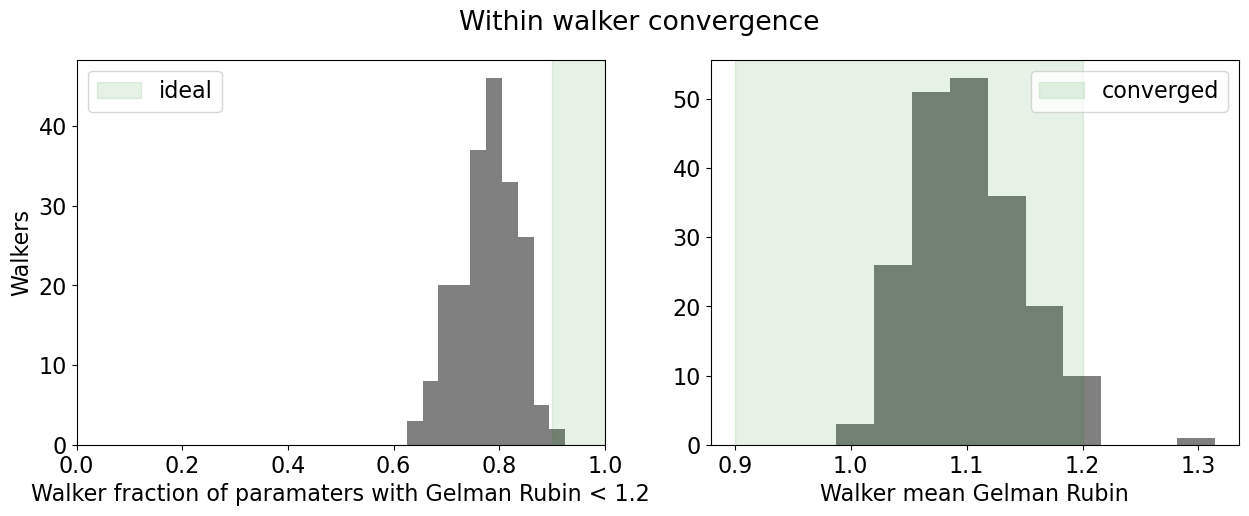

In [4]:
L = ['chain_1.cbr']
numpars = prt.numpars(c_loc,int(cbf["ID"][:]))
fracs,meangrs,Across_walkersgr  =  prt.DEMCMC_conv(L,numpars)
    
  
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Within walker convergence")
plt.subplot(1,2,1)
plt.hist(fracs,color = 'grey')
plt.xlabel('Walker fraction of paramaters with Gelman Rubin < 1.2')
plt.axvspan(.9, 1, alpha=0.1, color='green',label ='ideal')
plt.legend()
plt.ylabel('Walkers')
plt.xlim([0,1])

plt.subplot(1,2,2)
plt.hist(meangrs,color = 'grey')
plt.xlabel('Walker mean Gelman Rubin')
plt.axvspan(.9, 1.2, alpha=0.1, color='green',label ='converged')
plt.legend()

acfracgr = len(Across_walkersgr[Across_walkersgr<1.2])/len(Across_walkersgr)
acmeangr = np.mean(Across_walkersgr)
print("Across Walker Convergence % Gelman Rubin less then 1.2: " + str(round(acfracgr*100,3)) + "%")
print("Across Walker Mean Gelman Rubin Convergence : " + str(round(acmeangr,3)))
plt.show()

# Plot posterior paramater distribution

chain_1.cbr


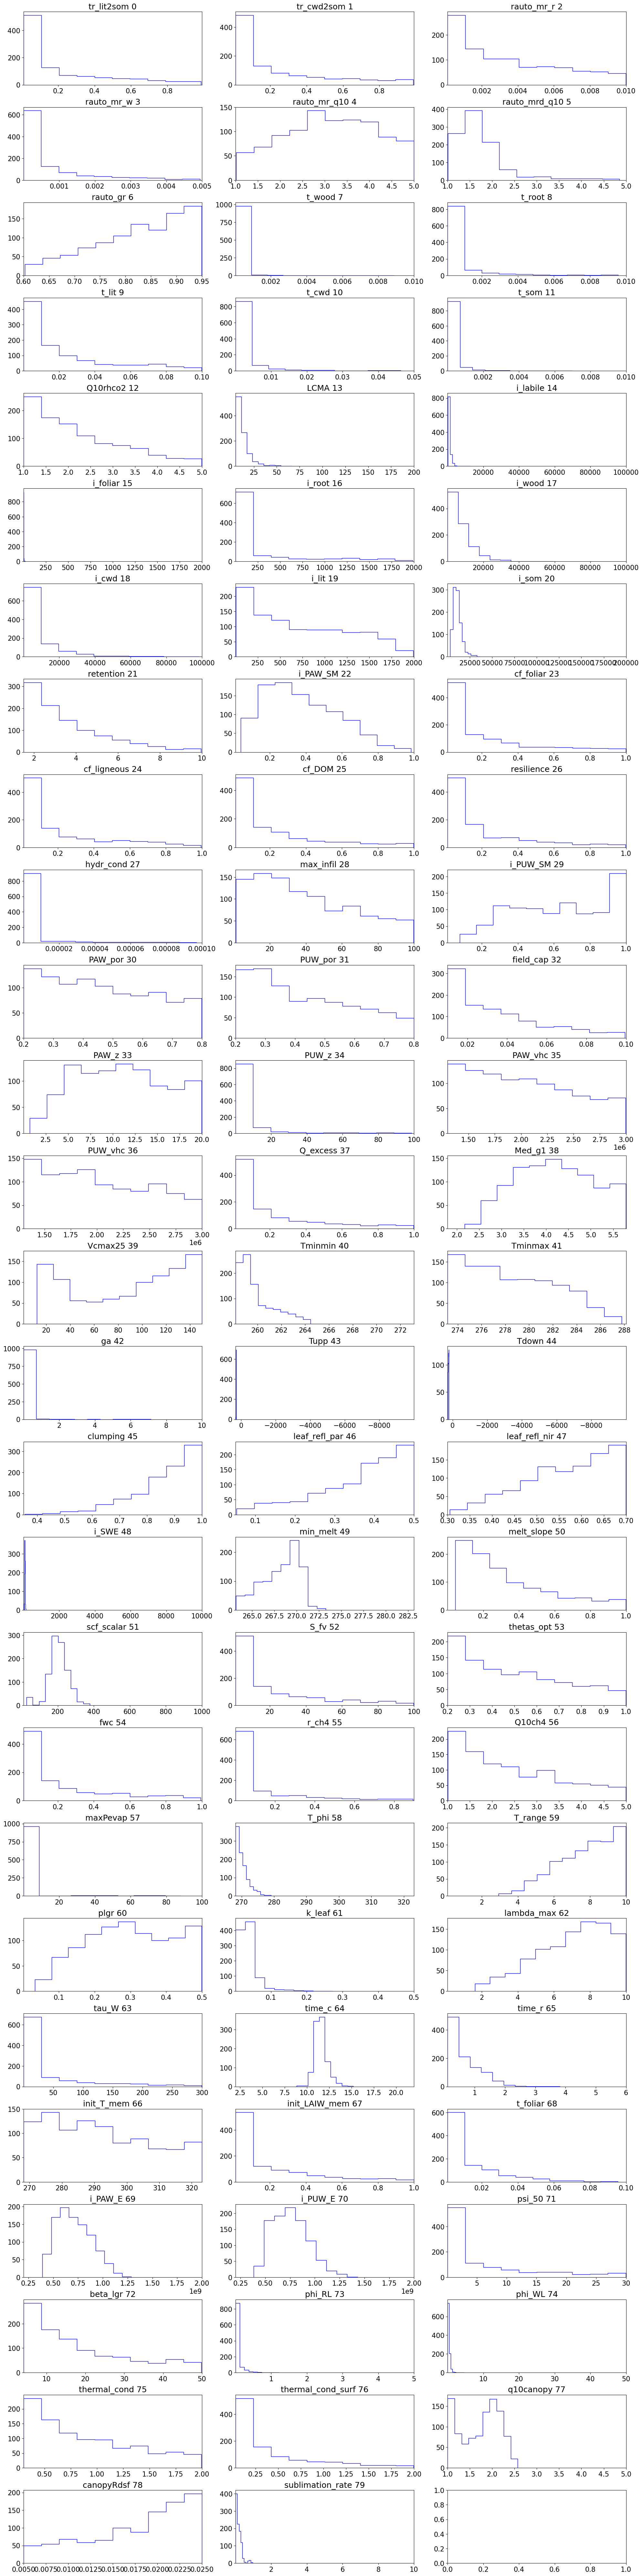

In [5]:
parinfo = prt.cbr_info(c_loc, int(cbf["ID"][:]))
print(L[0])
cbrfile = L[0]

cbr = prt.read_cbr_file(cbrfile,numpars)

plt.rcParams.update({'font.size': 15})
f, axs = plt.subplots(int(numpars/3)+1,3,figsize=(20,80))
f.tight_layout(pad=1.5)
for i,a in enumerate(parinfo.keys()):
    plt.subplot(int(numpars/3)+1,3,i+1)
    plt.title(a + " " + str(i))
    plt.hist(cbr[:,parinfo[a][0]],color = 'blue',histtype=u'step')
    plt.xlim(parinfo[a][1],parinfo[a][2])#This line set the x axis to the prior distributino range remove for closer detail on distribution
 


## Run DALEC with posterior paramater distributions 

In [6]:
exitcode_DALEC_run = subprocess.run([c_loc+"C/projects/CARDAMOM_GENERAL/CARDAMOM_RUN_MODEL.exe", 
                              cbffile,
                              cbrfile] , capture_output=True)

print(" ".join(exitcode_DALEC_run.args),"\n")
print("run errors:",exitcode_DALEC_run.returncode,"\n","".join(exitcode_DALEC_run.stderr.decode("utf-8")))



../../C/projects/CARDAMOM_GENERAL/CARDAMOM_RUN_MODEL.exe fluxval_US-NR1_1100_ABGB_ET_GPP_mLAI_NBE_SCF_SOM_SHORT_REDUCED_UNC.cbf.nc chain_1.cbr 

run errors: 0 
 


## Compare DALEC output to assimilated data

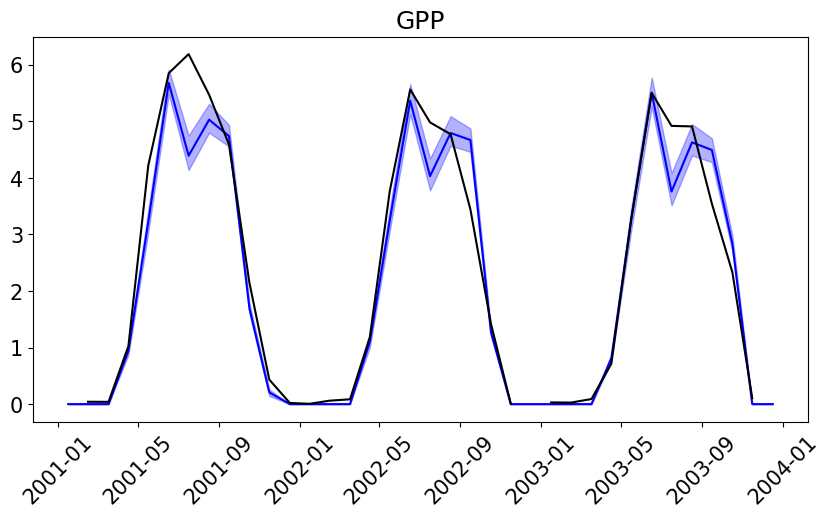

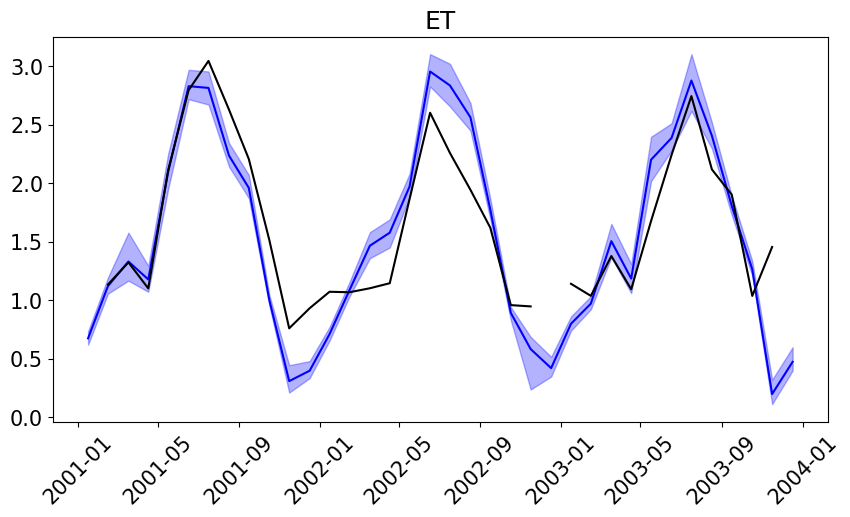

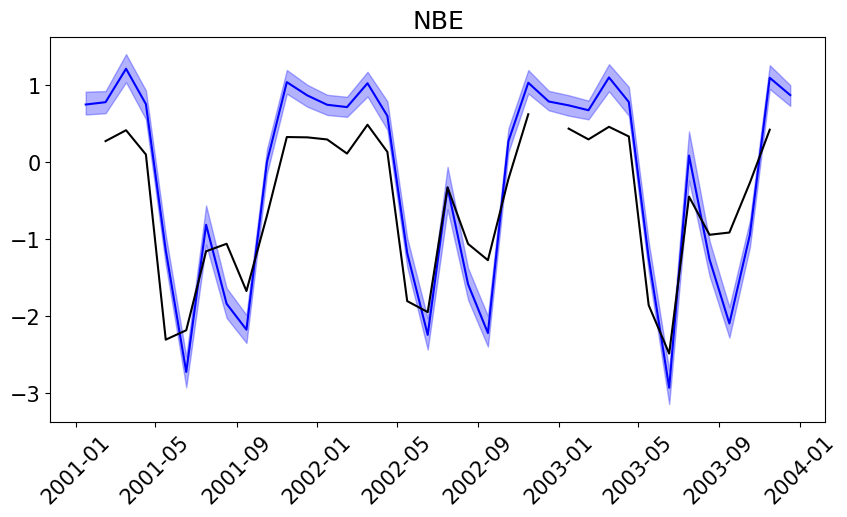

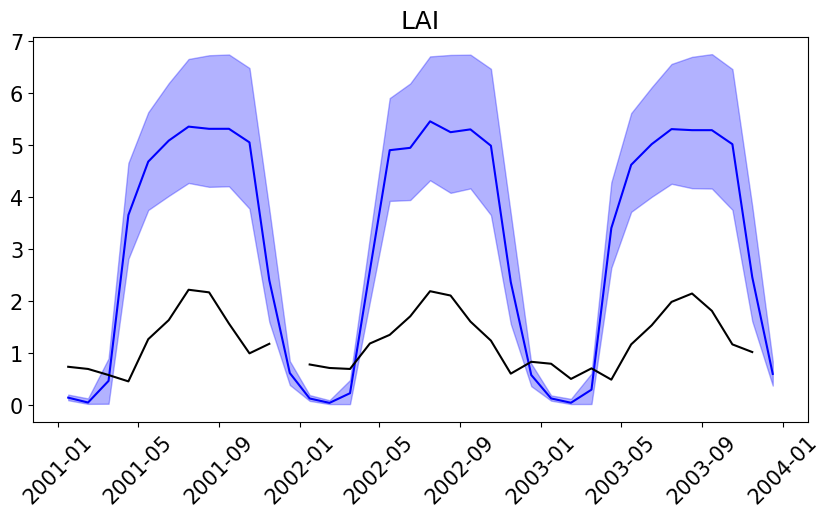

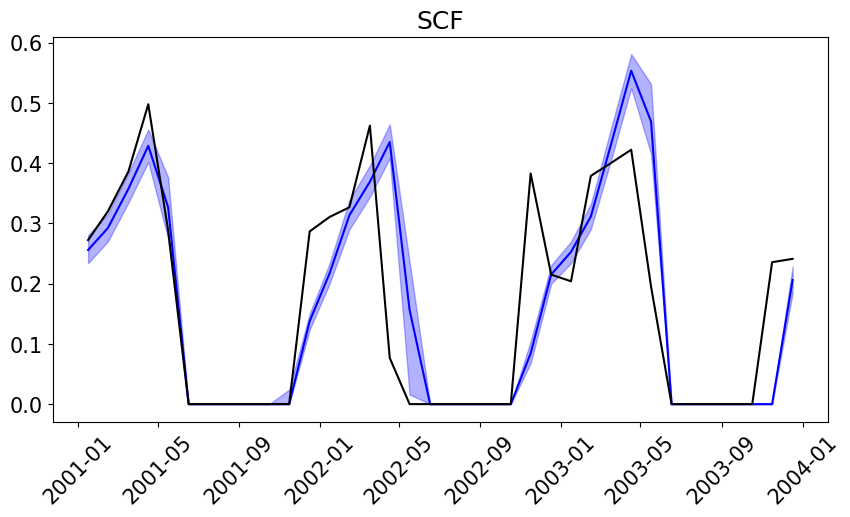

In [7]:
Fluxes = prt.get_flux(cbrfile+'.nc')
Pools = prt.get_pool(cbrfile+'.nc')

assim_fluxes = prt.assim_data_fluxes(c_loc,int(cbf["ID"][:]))
assim_pools = prt.assim_data_pools(c_loc,int(cbf["ID"][:]))

# print(cbf.variables.keys())



#plot assimilated fluxes
for af in assim_fluxes:
    if(af in cbf.variables.keys() and type(assim_fluxes[af])!=list and np.sum(~np.isnan(cbf[af][:])) ):
        plt.figure(figsize = (10,5))
        plt.title(af)
        prt.pltoutput(dates,Fluxes[:,:,assim_fluxes[af]],color = 'blue')
        prt.pltassimdata(dates,cbf[af][:])
    elif(af in cbf.variables.keys() and np.sum(~np.isnan(cbf[af][:])) ):
        plt.figure(figsize = (10,5))
        plt.title(af)
        y = np.zeros( Fluxes[:,:,0].shape)
        for a,b in zip(assim_fluxes[af][0],assim_fluxes[af][1]):
            y += Fluxes[:,:,a]*b
        prt.pltoutput(dates,y,color = 'blue')
        prt.pltassimdata(dates,cbf[af][:])
        
    
#plot assimilated pools
for pf in assim_pools:
    if(pf in cbf.variables.keys() and type(assim_pools[pf])!=list and np.sum(~np.isnan(cbf[pf][:]))):
        plt.figure(figsize = (10,5))
        plt.title(pf)
        prt.pltoutput(dates,Pools[:,:-1,assim_pools[pf]],color = 'blue')
        prt.pltassimdata(dates,cbf[pf][:])
    elif(pf in cbf.variables.keys()and np.sum(~np.isnan(cbf[pf][:]))):

        plt.figure(figsize = (10,5))
        plt.title(pf)
        y = np.zeros( Pools[:,:-1,0].shape)
        for a in assim_pools[pf]:
            y += Pools[:,:-1,a]
        prt.pltoutput(dates,y,color = 'blue')
        prt.pltassimdata(dates,cbf[pf][:])
        
        





plt.show()


## Plot DALEC Fluxes from optimal parmaters

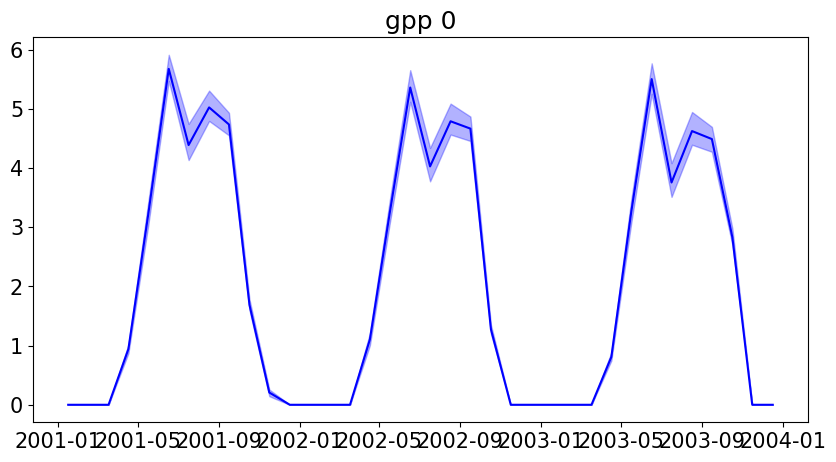

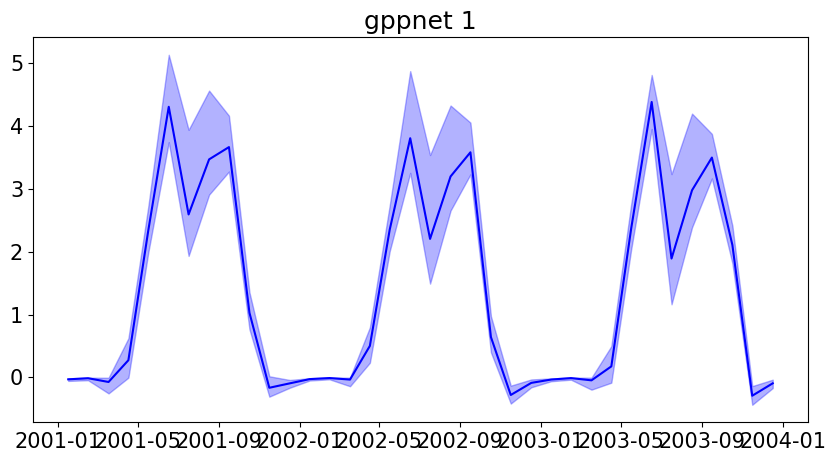

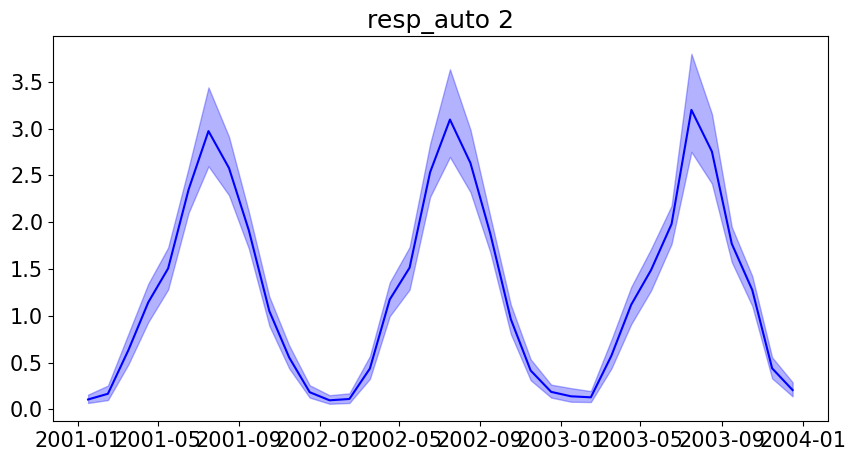

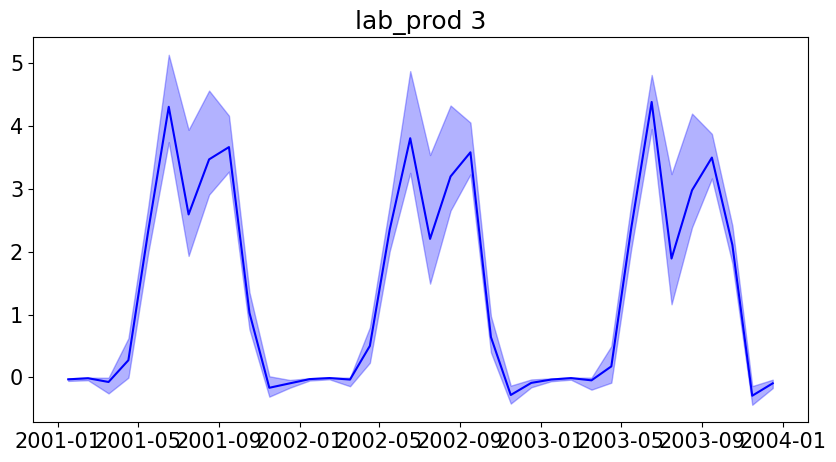

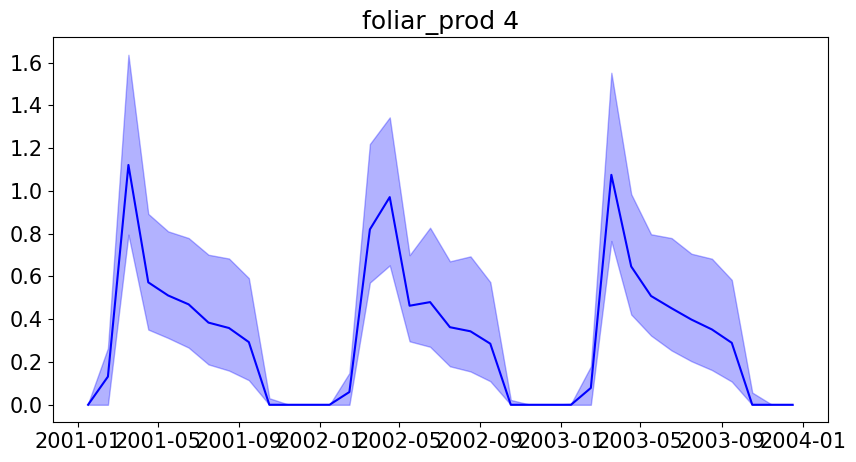

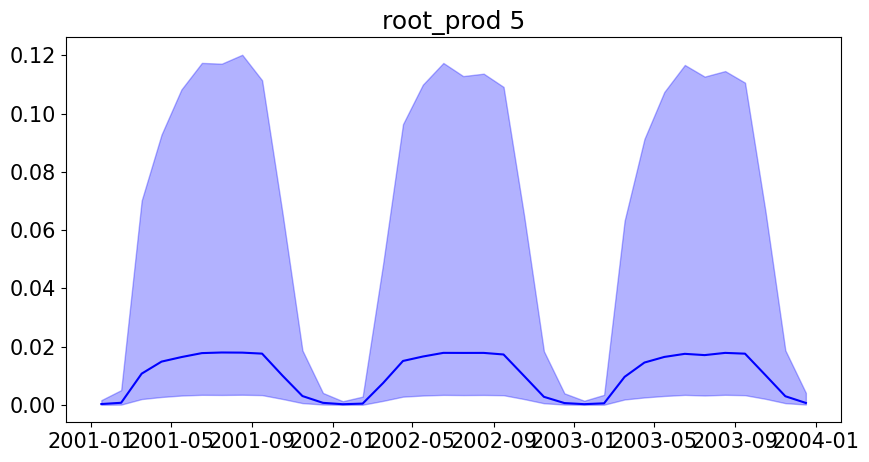

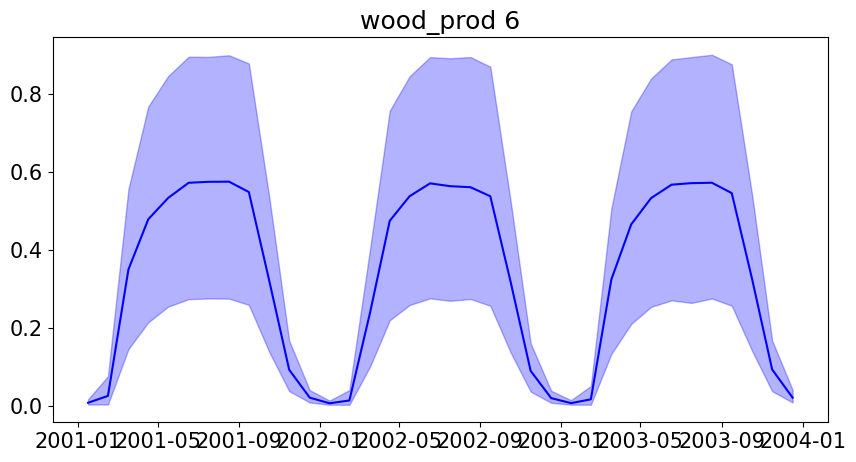

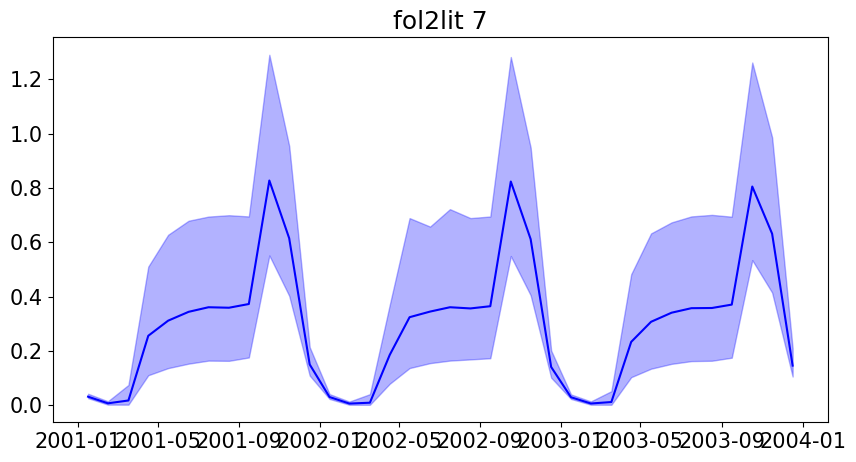

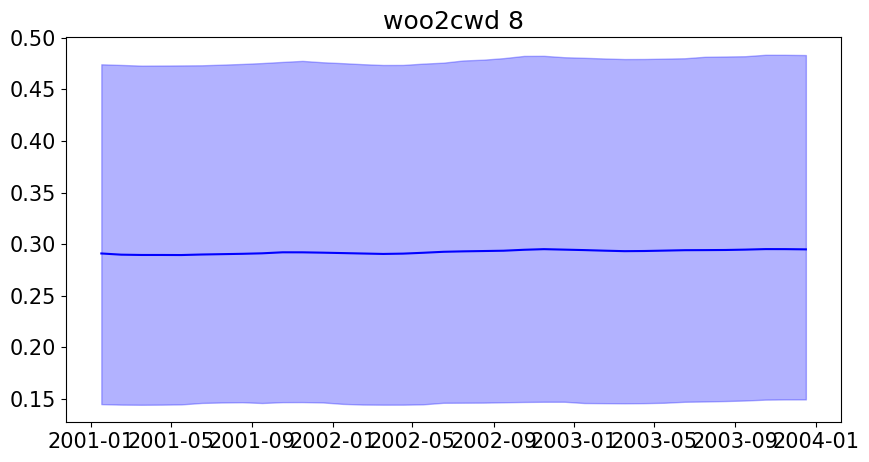

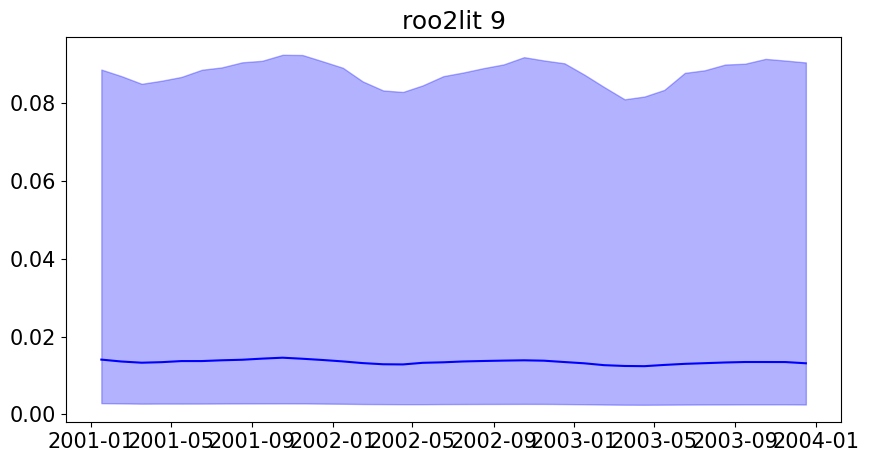

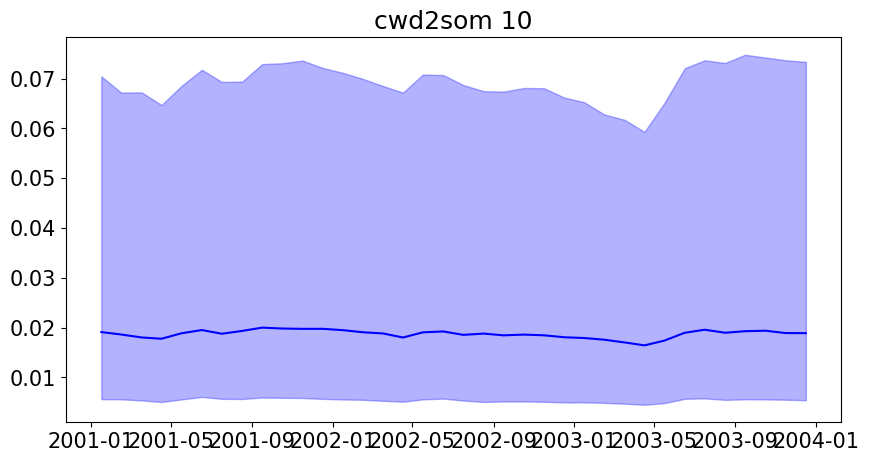

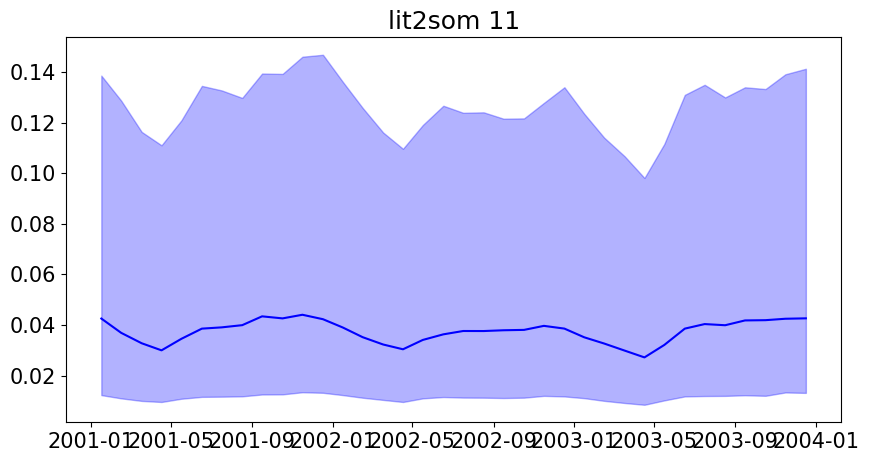

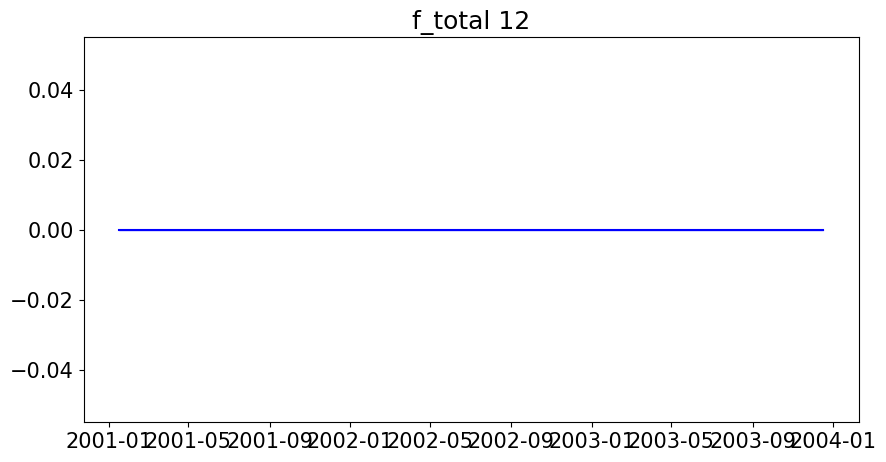

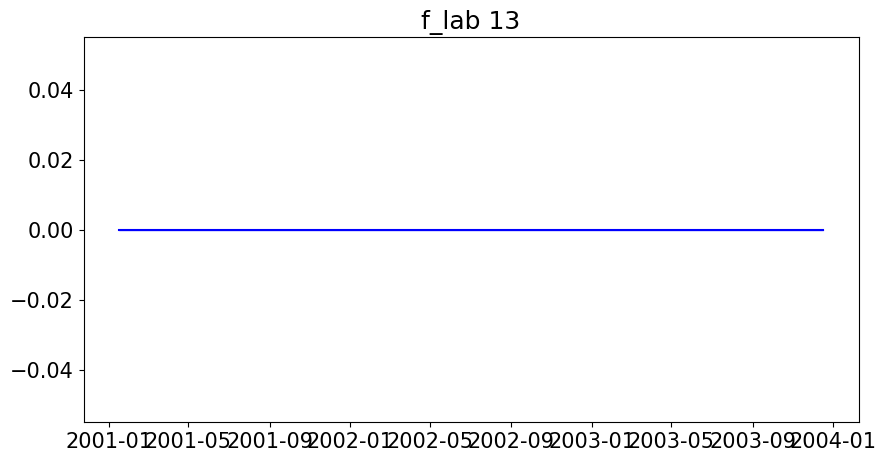

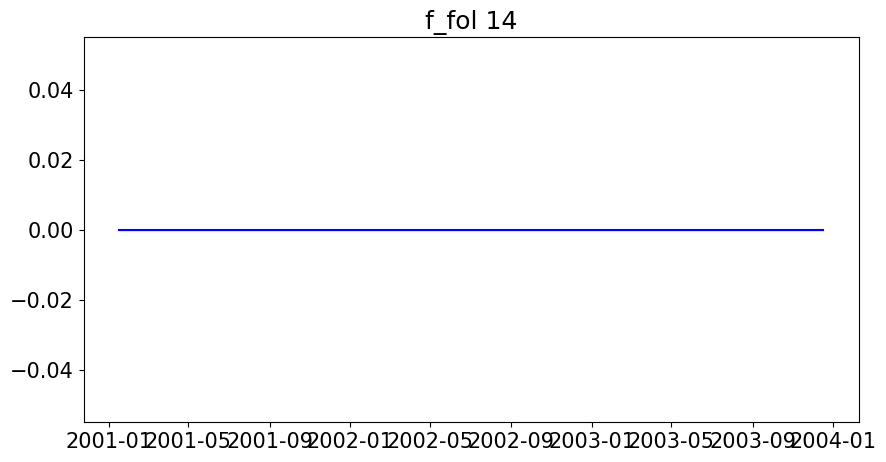

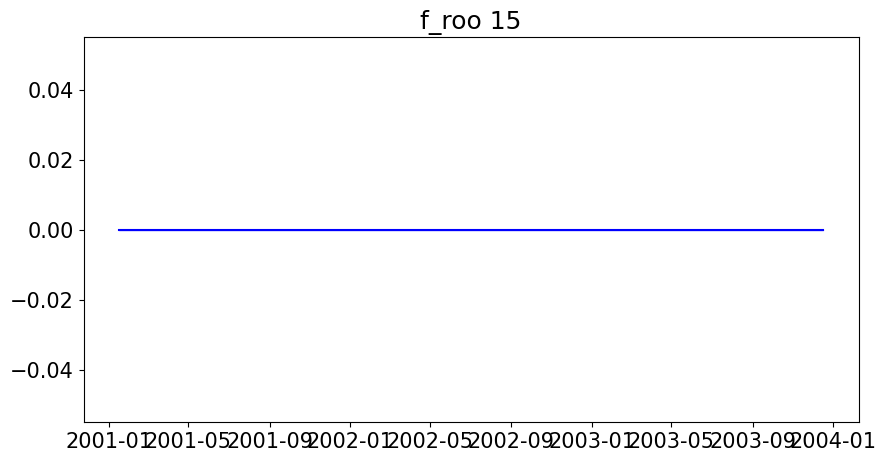

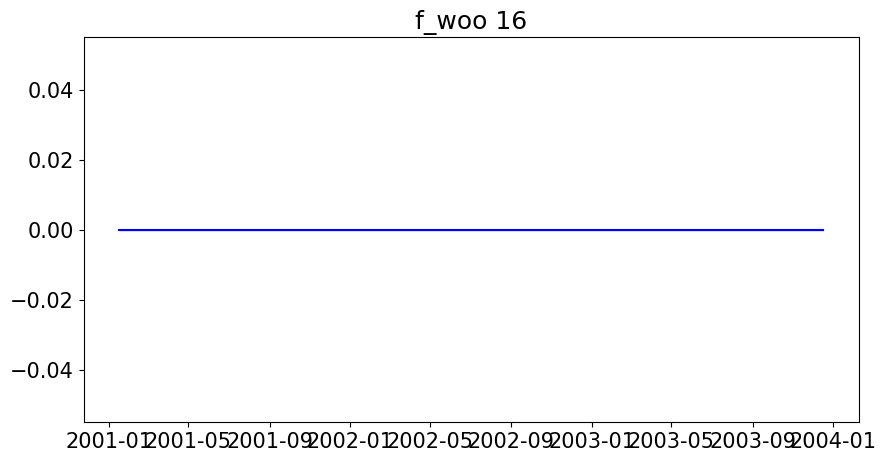

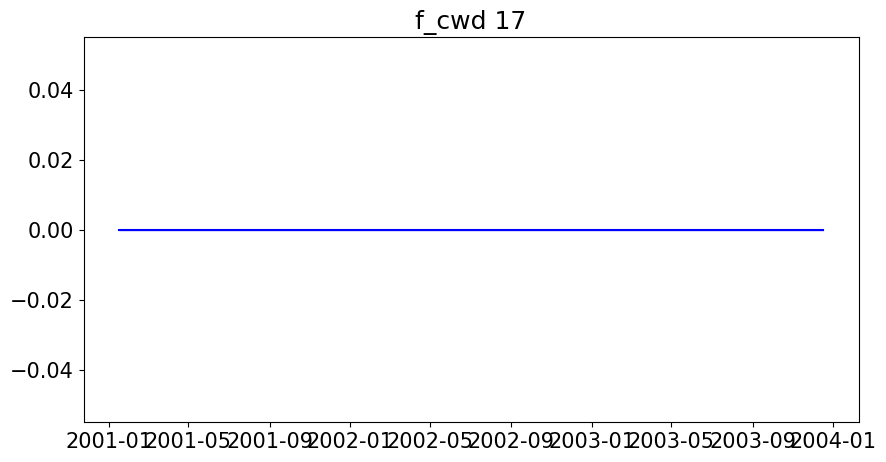

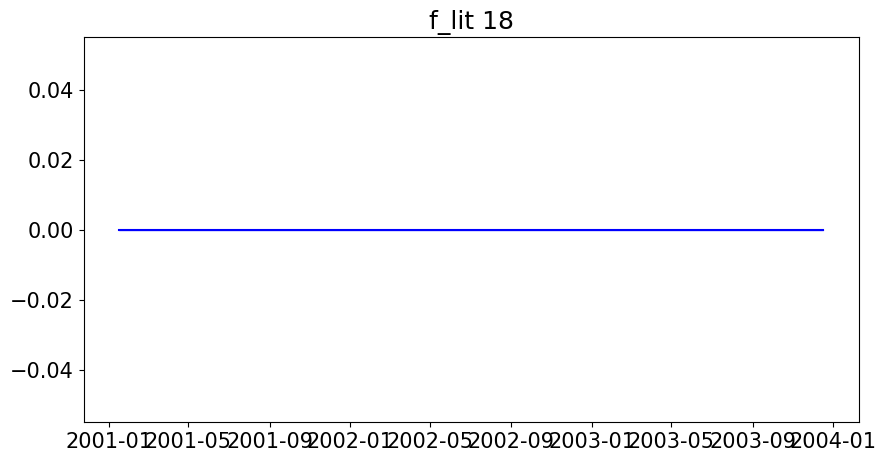

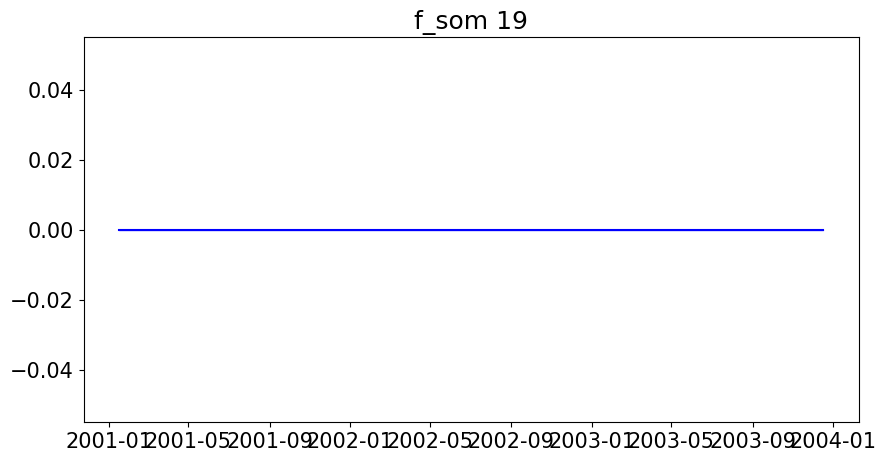

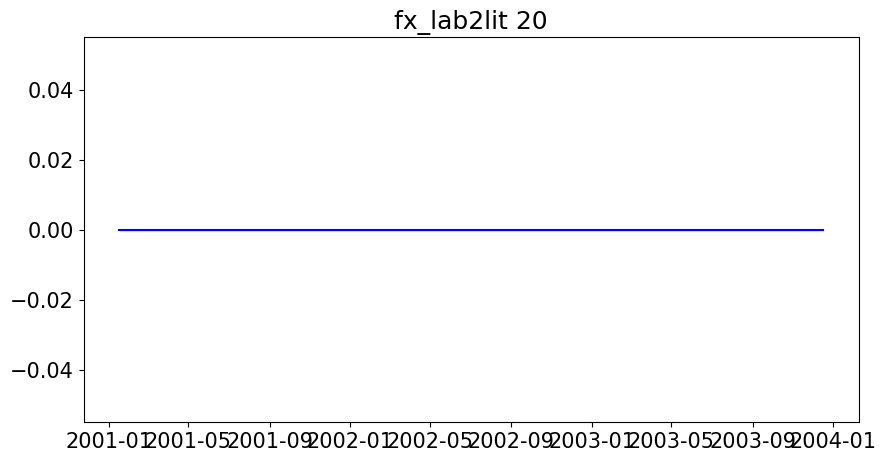

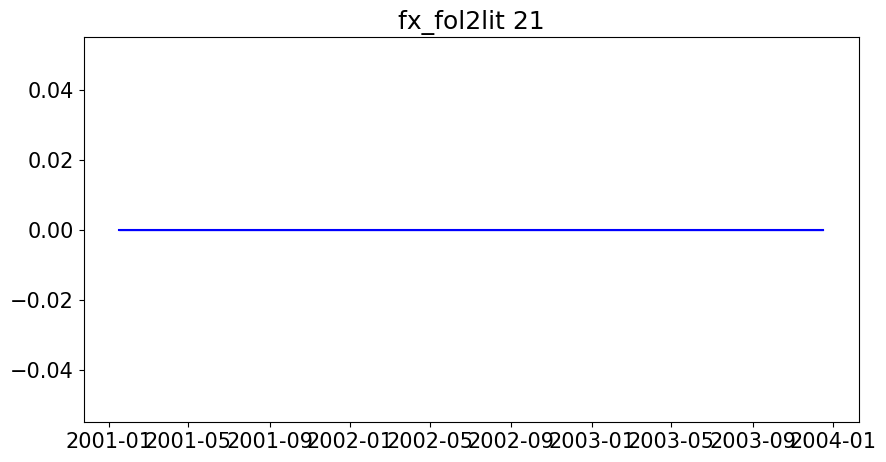

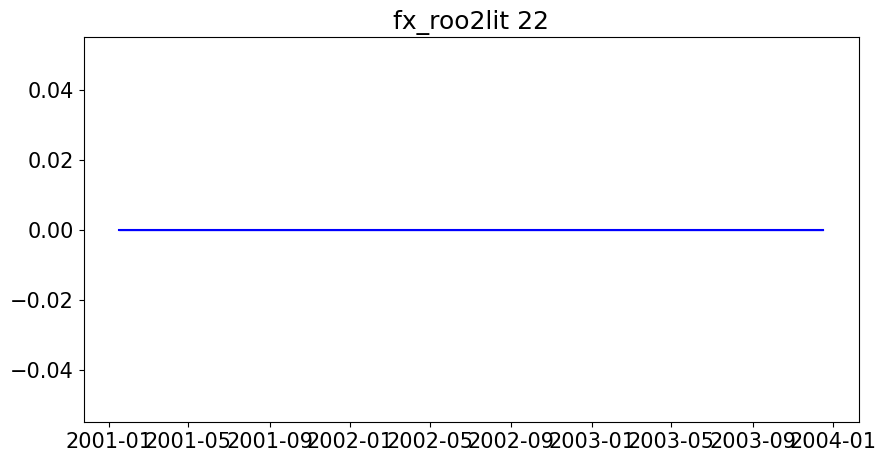

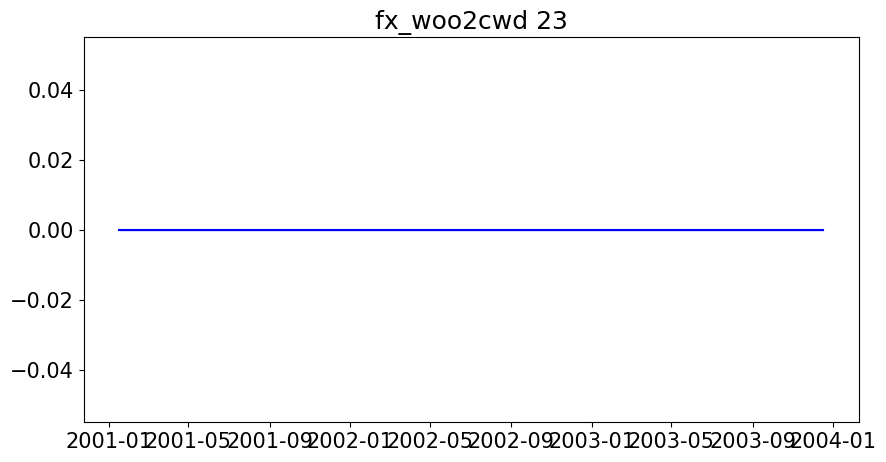

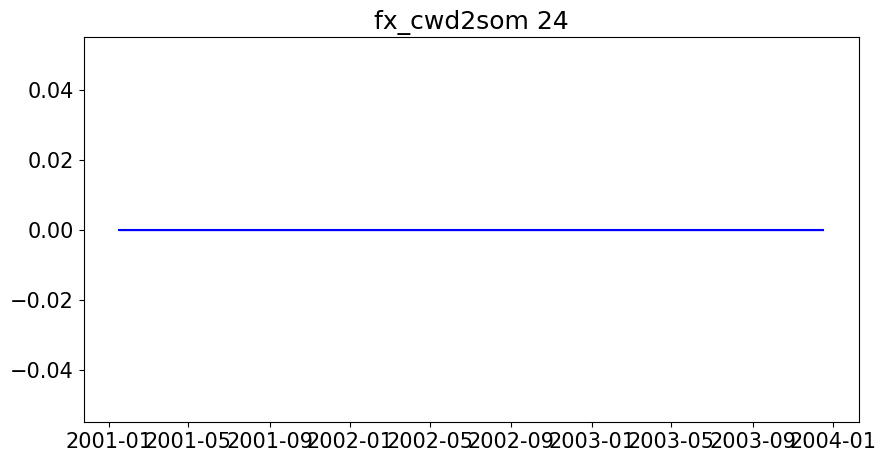

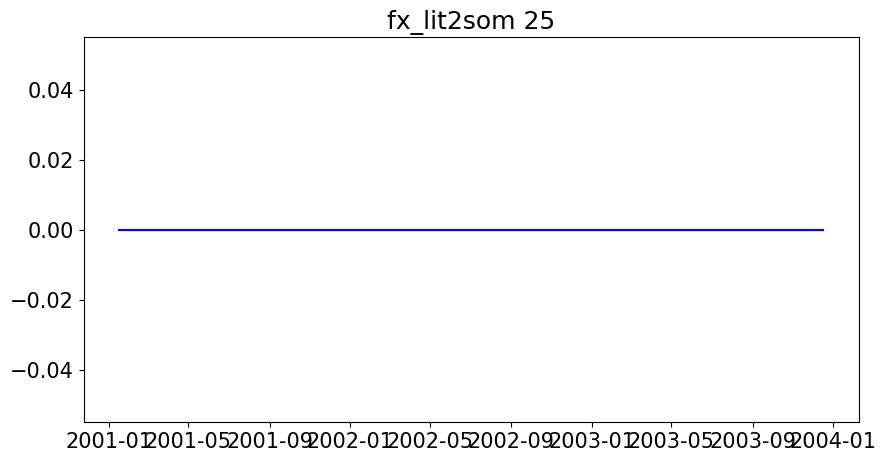

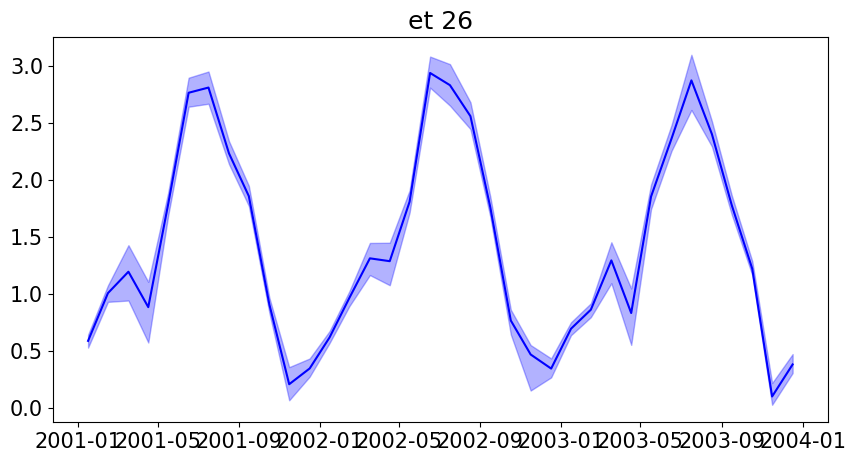

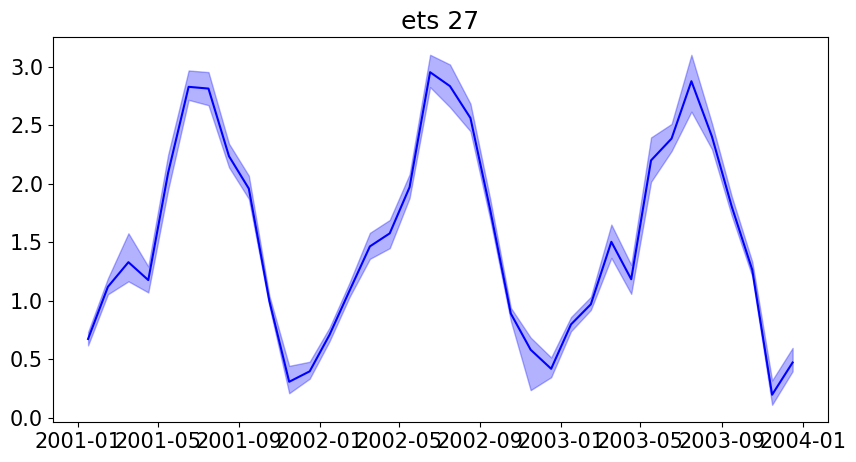

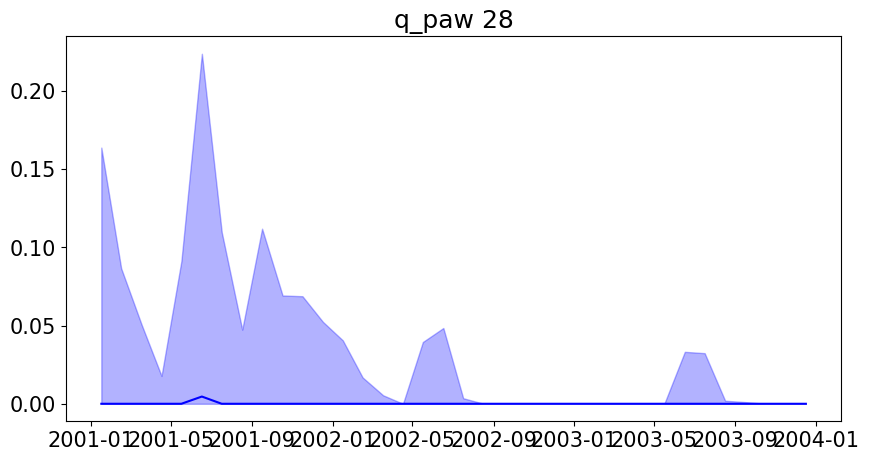

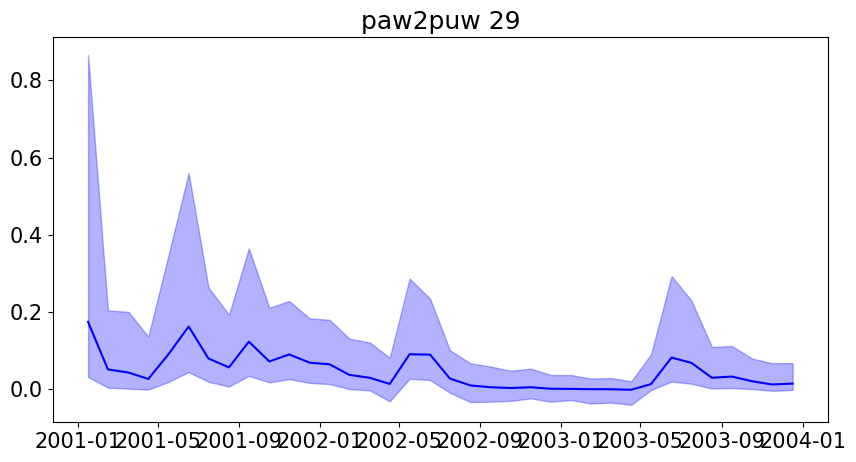

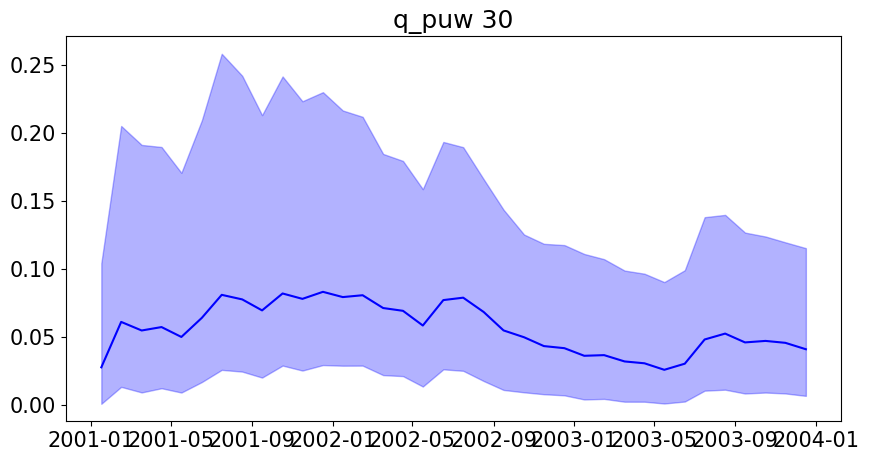

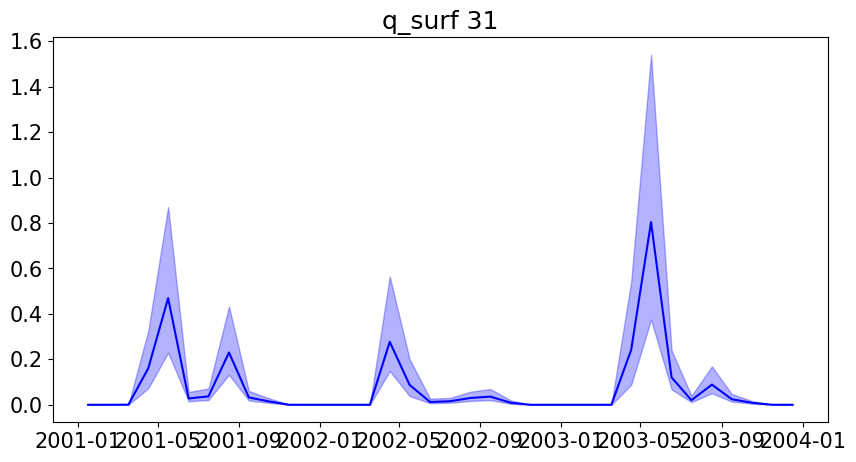

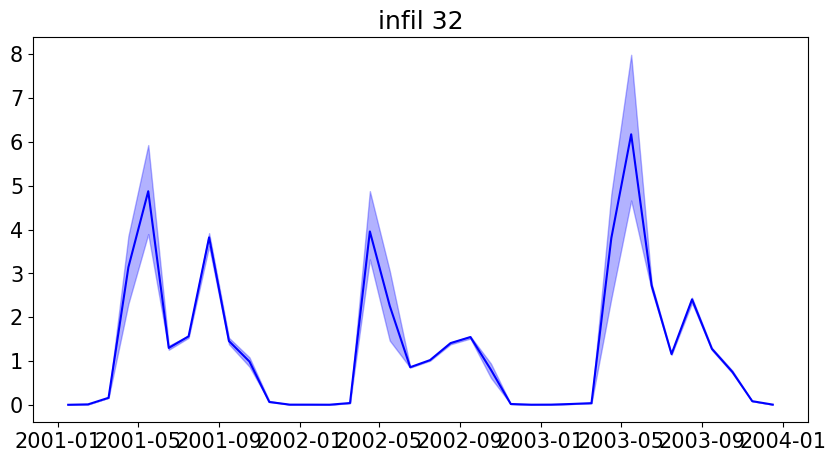

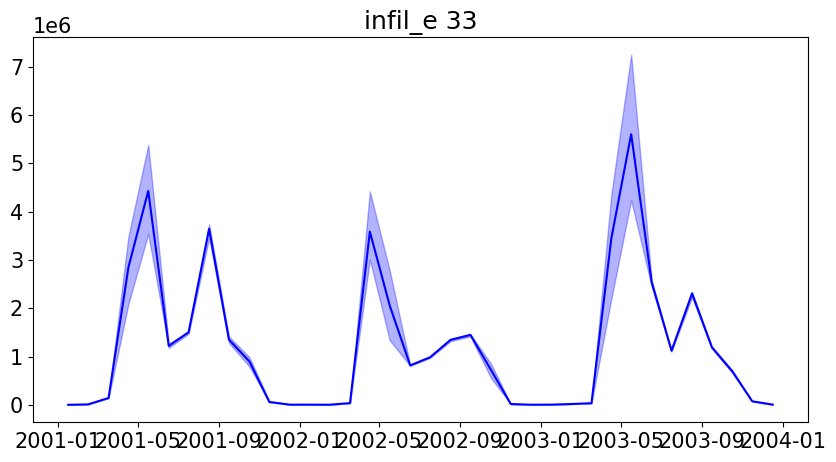

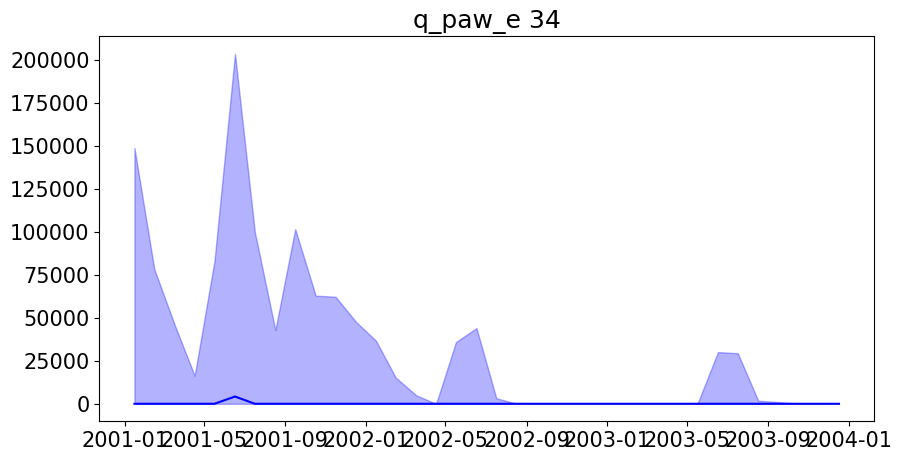

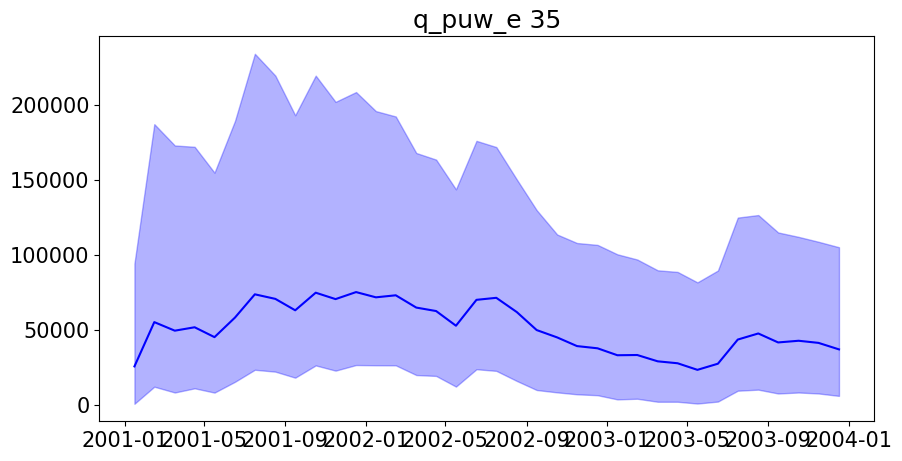

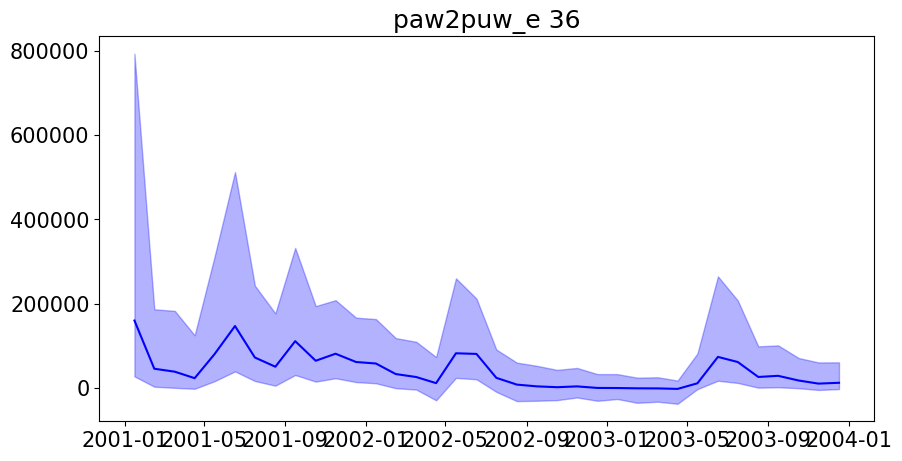

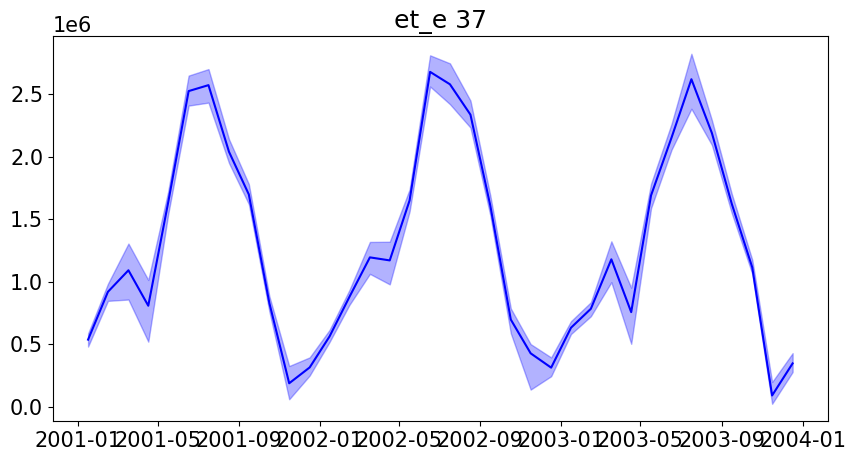

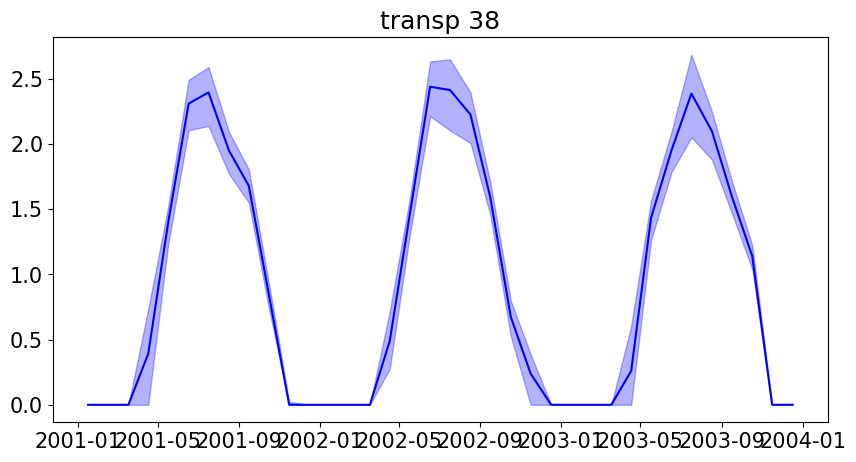

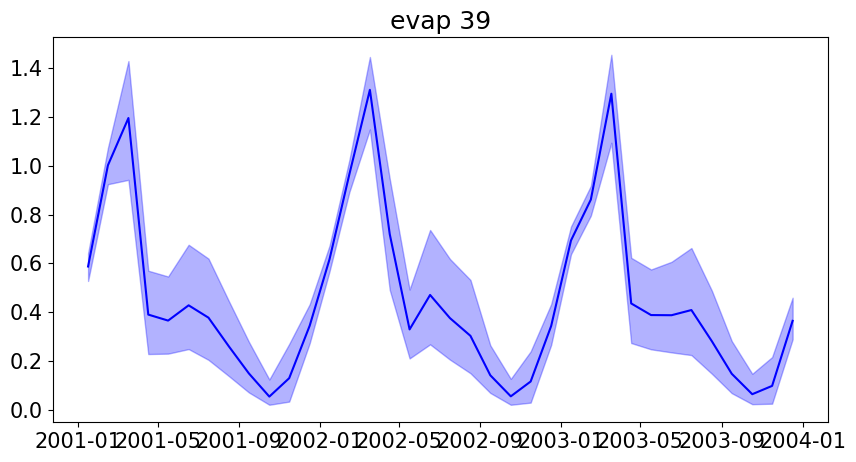

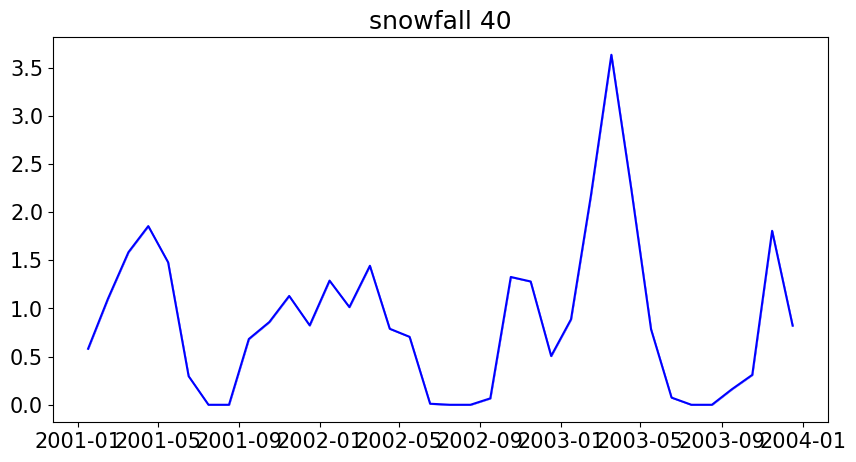

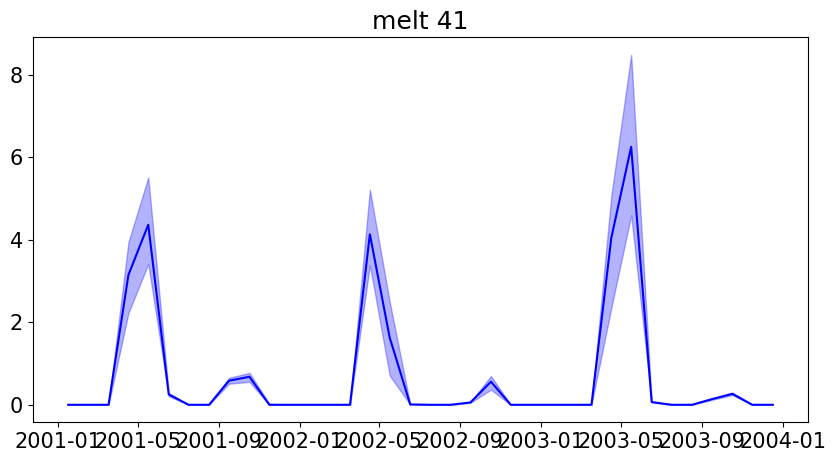

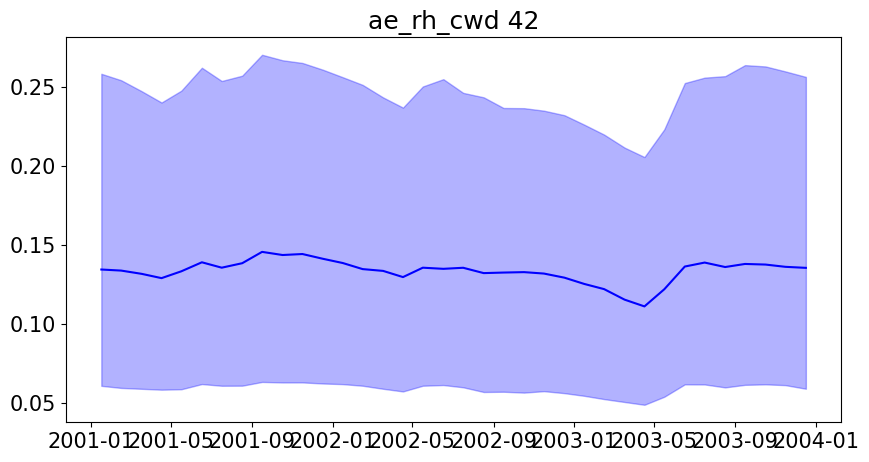

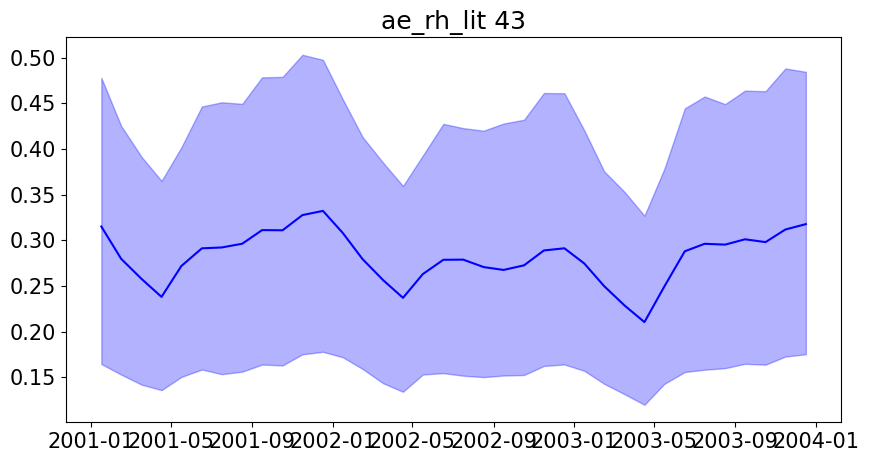

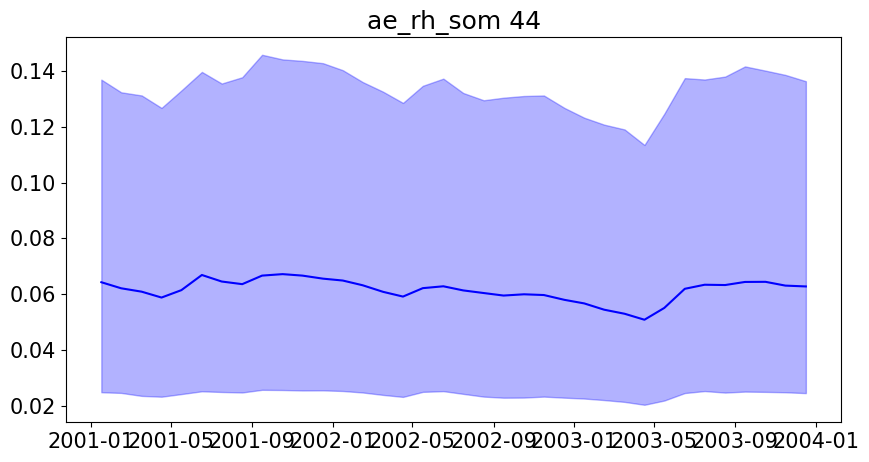

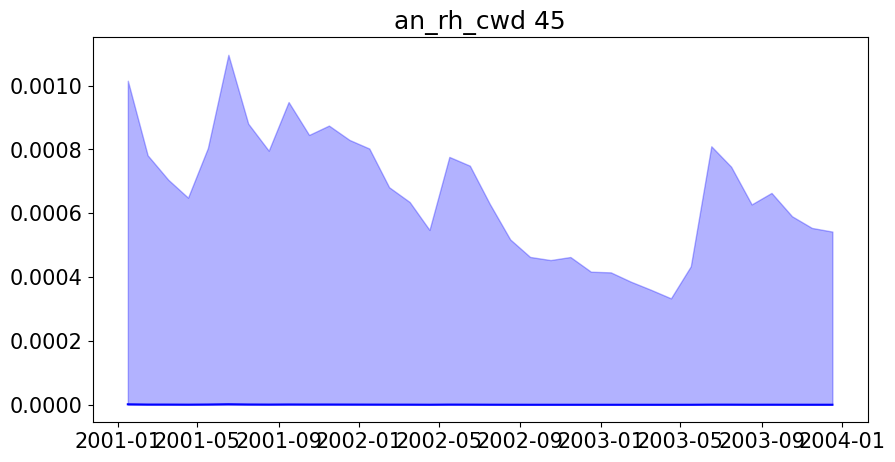

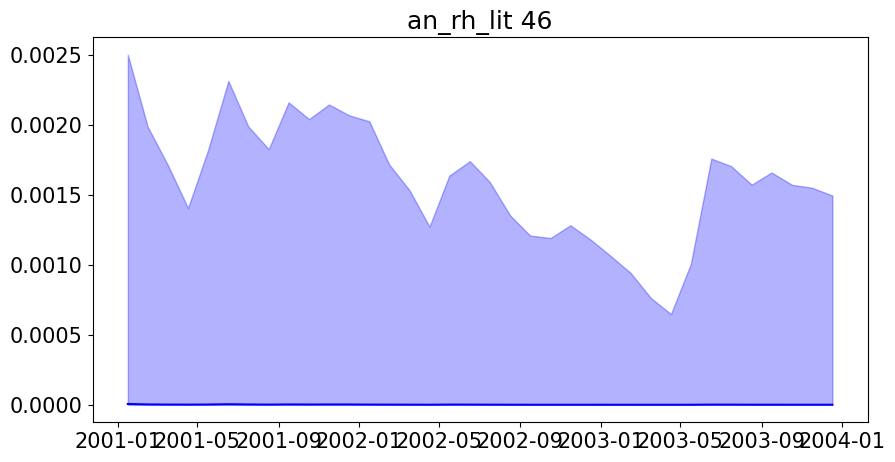

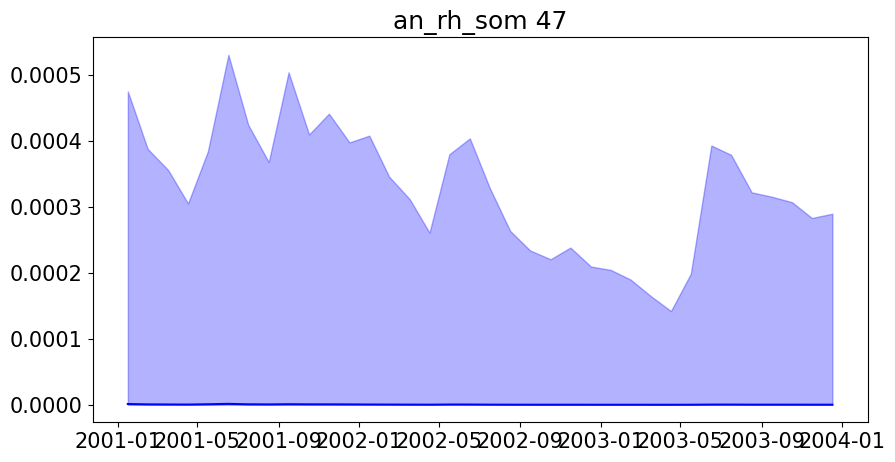

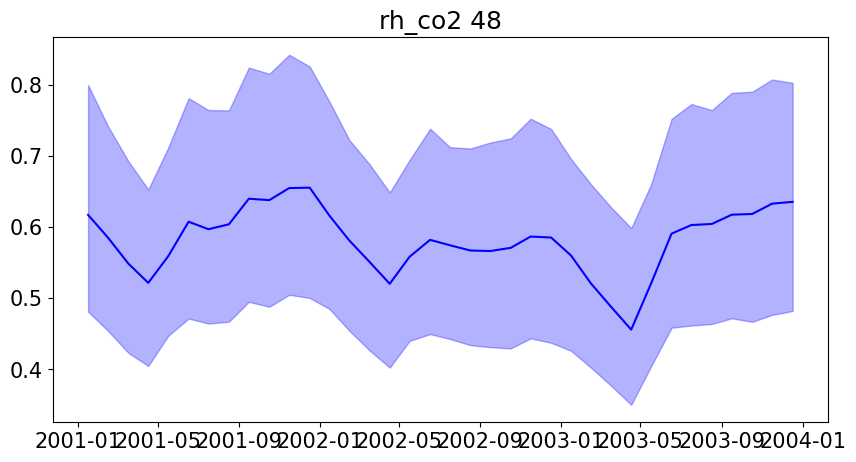

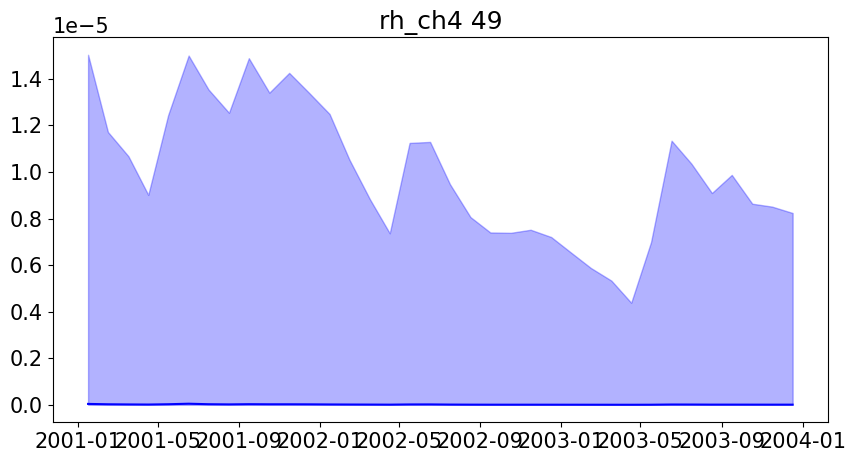

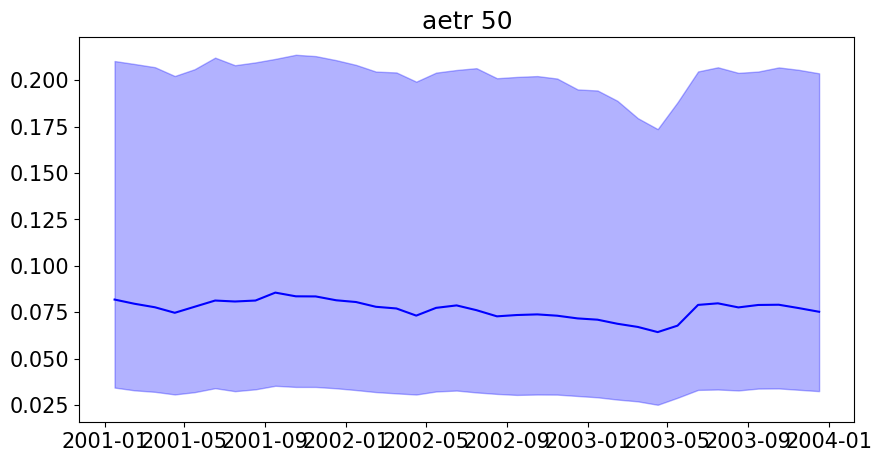

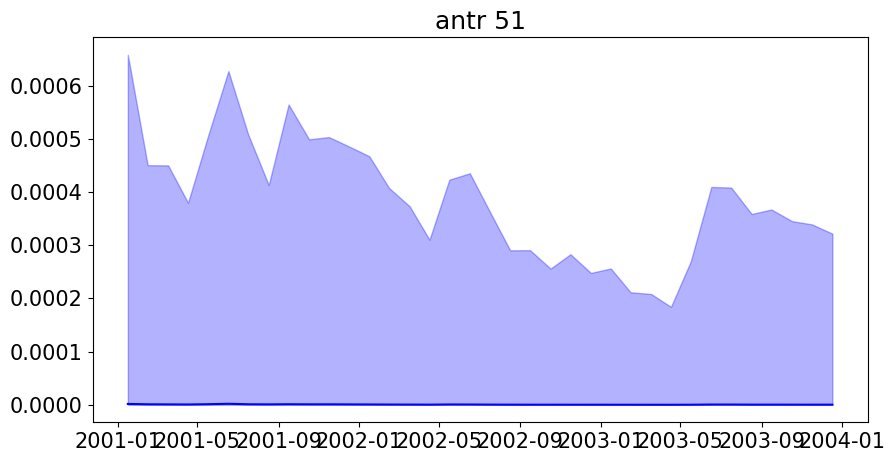

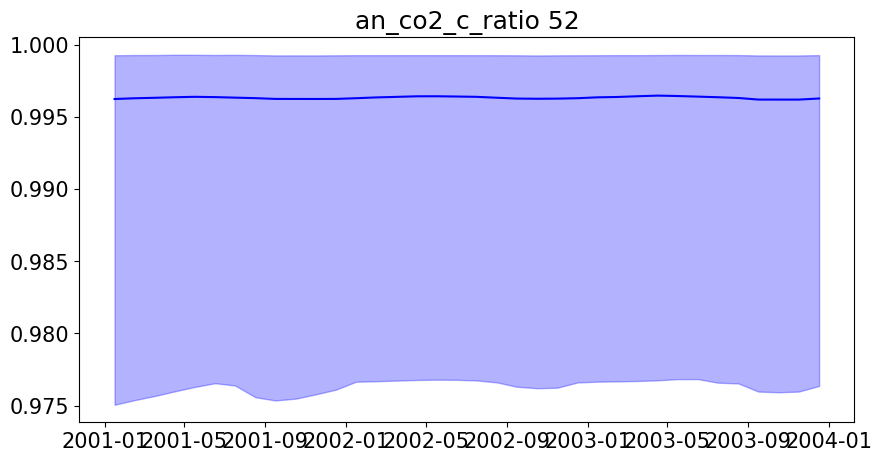

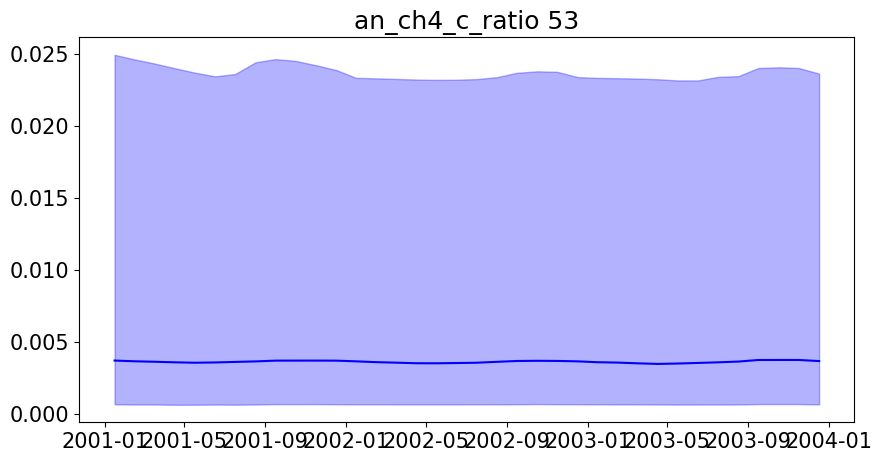

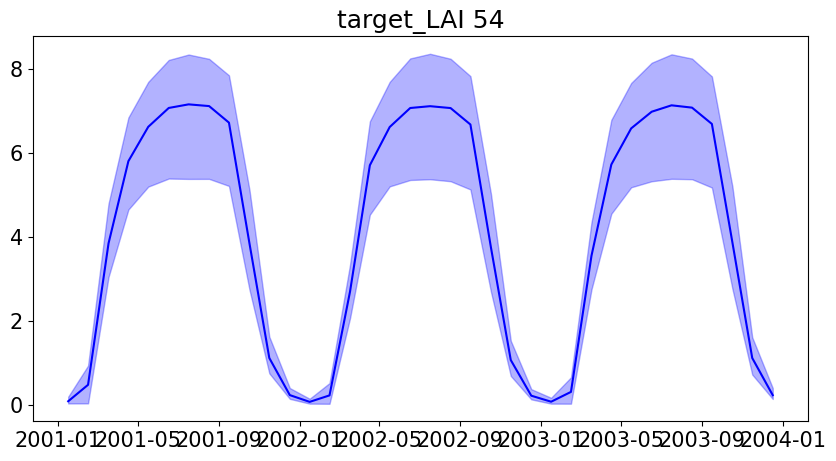

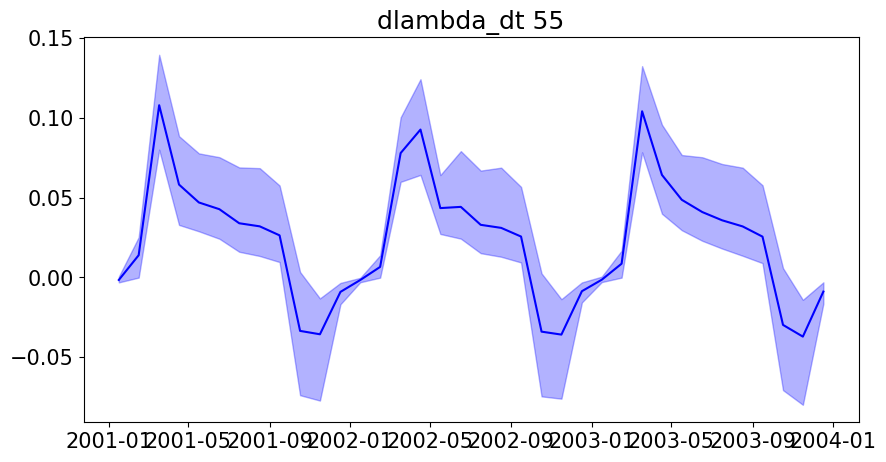

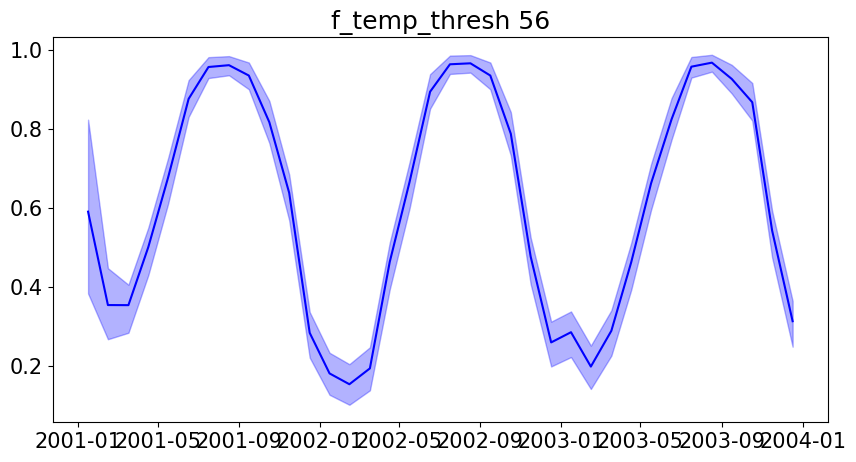

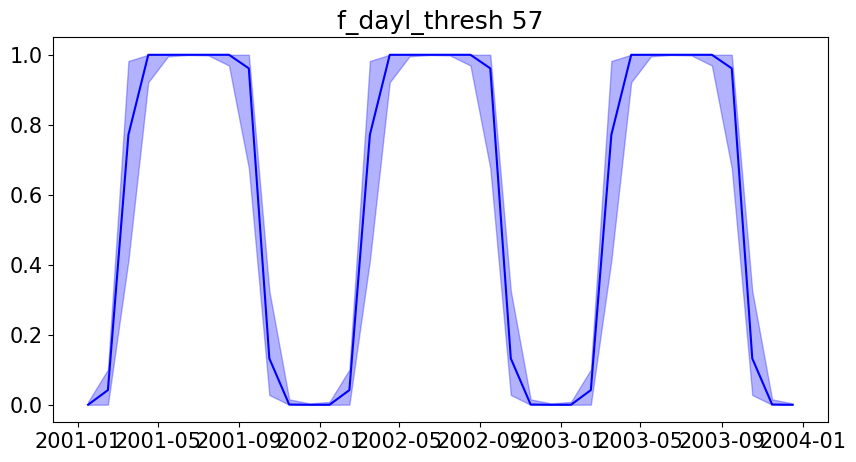

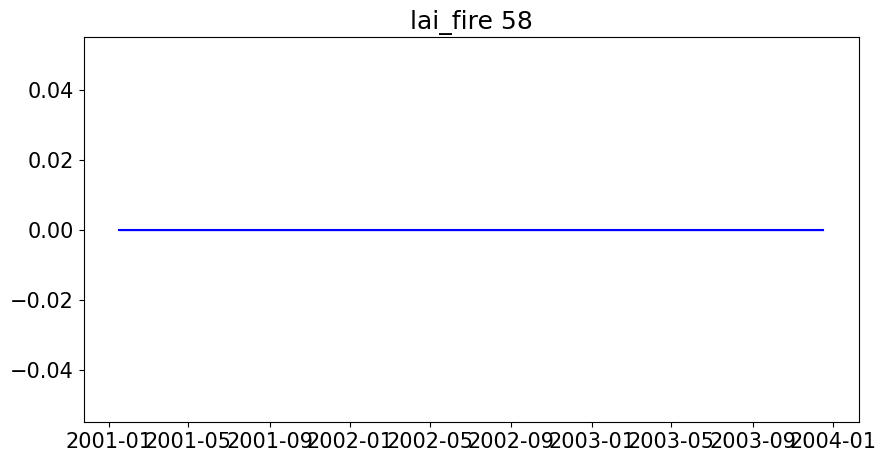

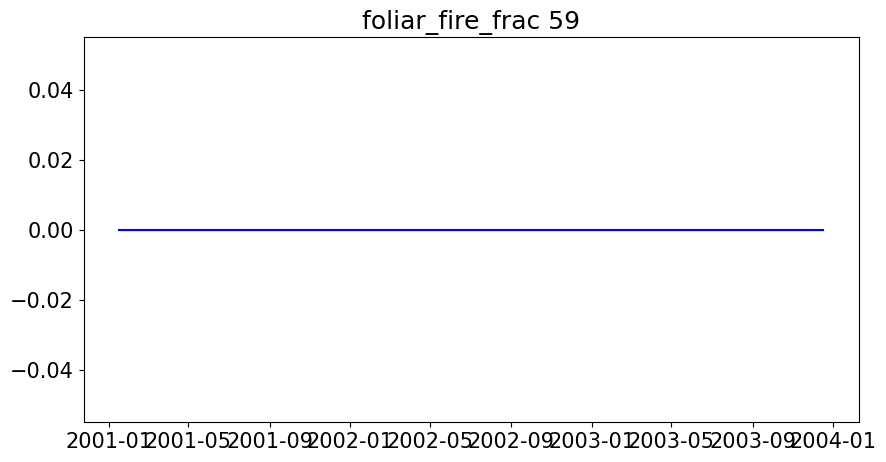

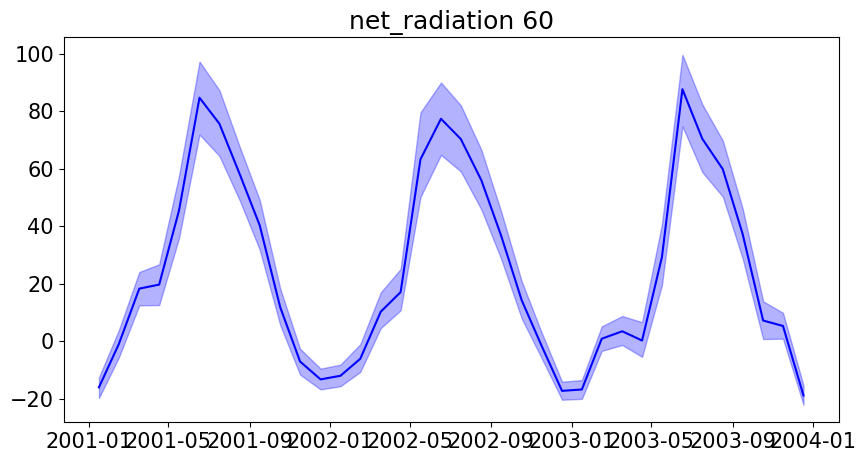

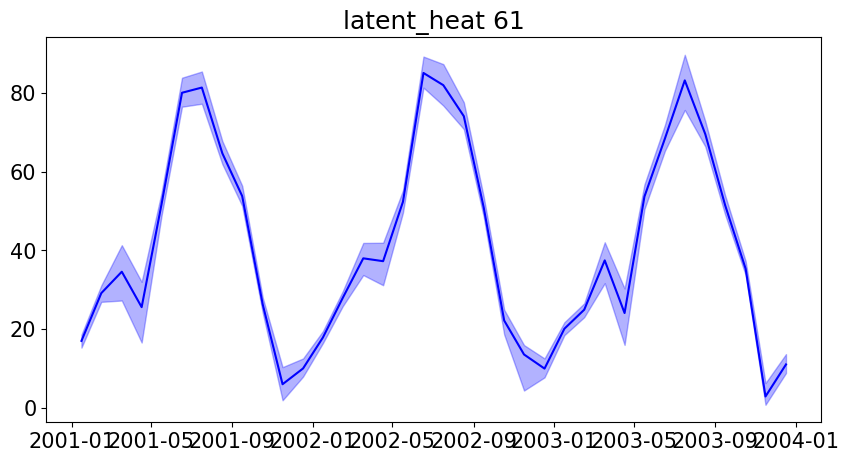

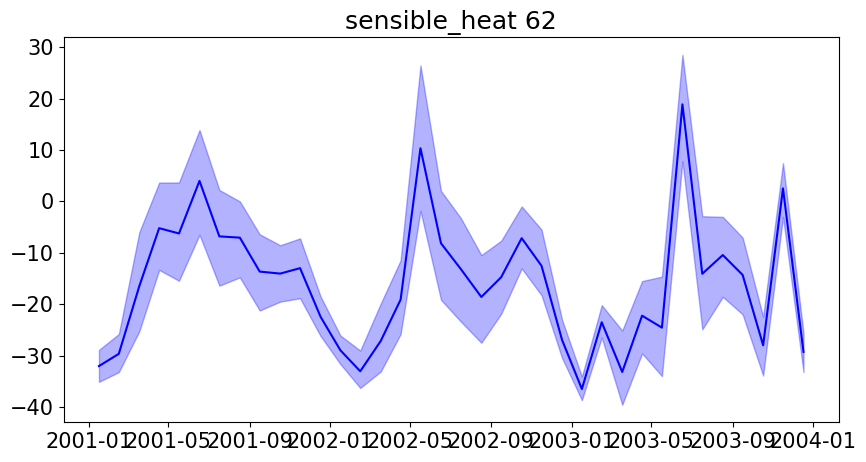

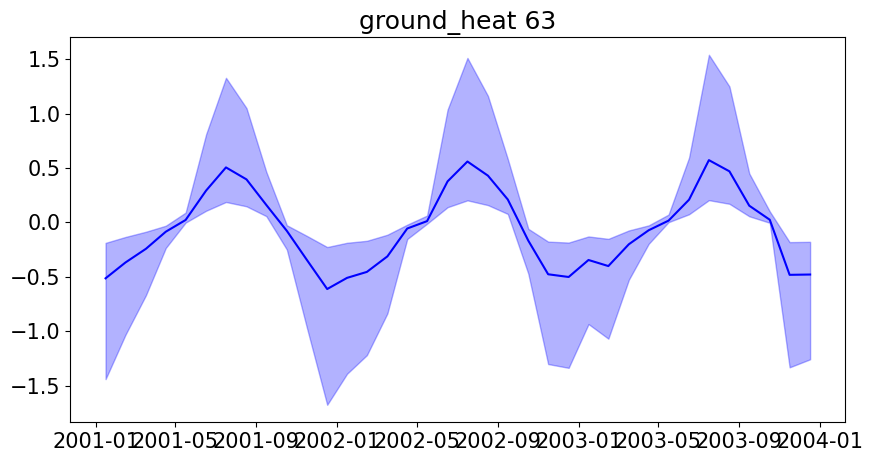

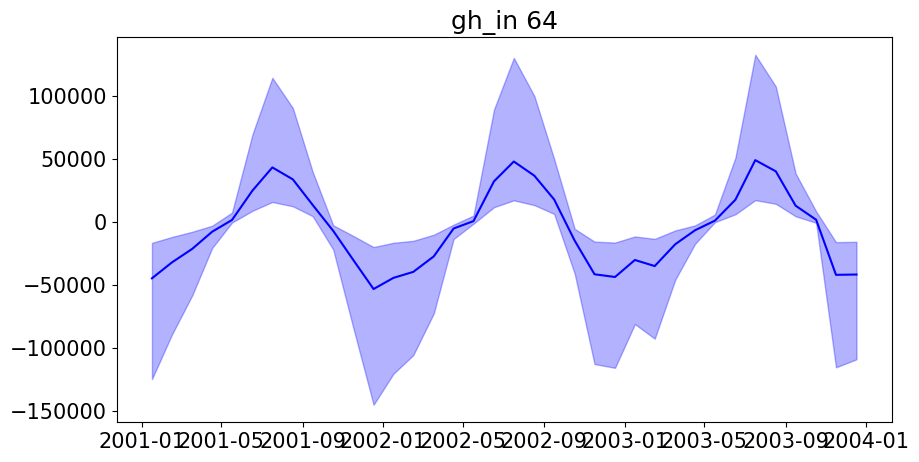

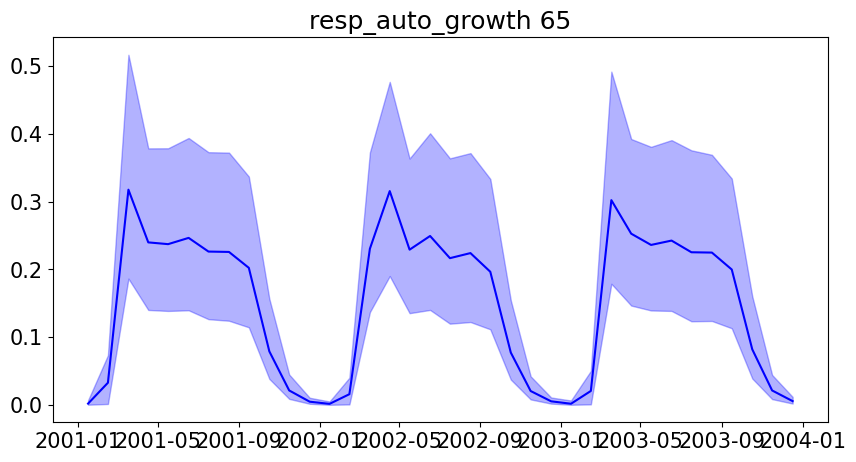

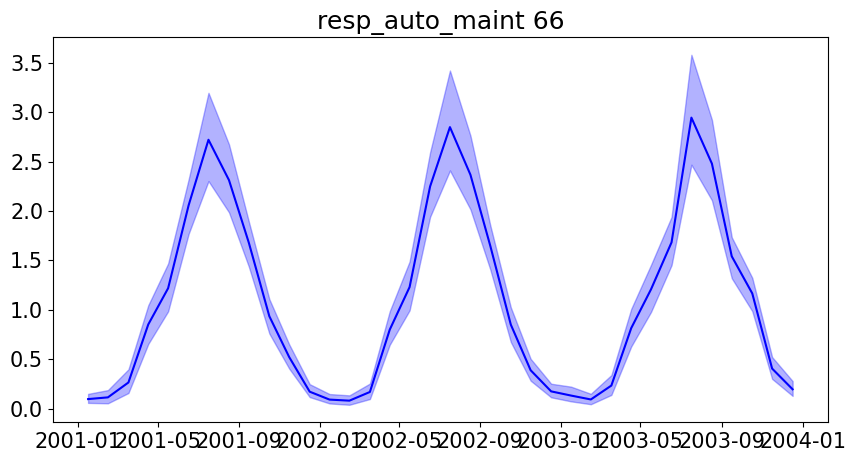

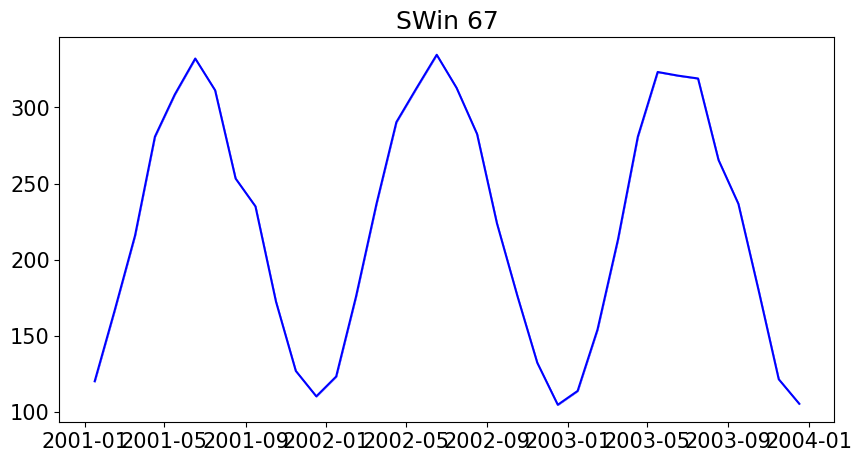

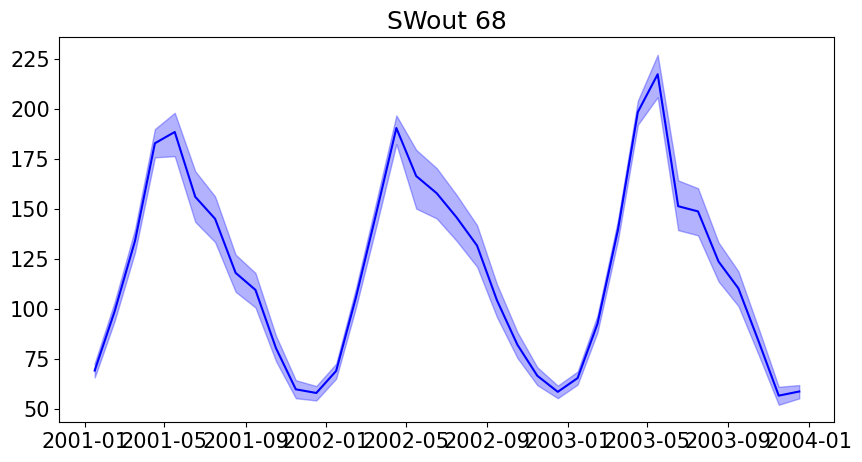

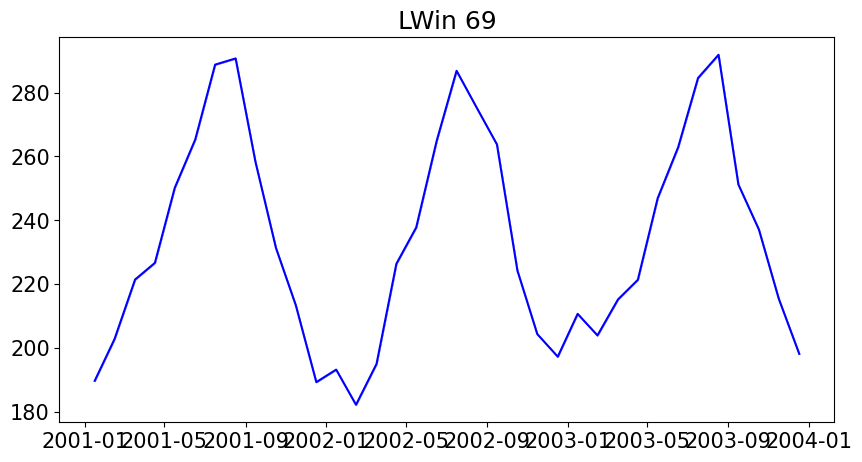

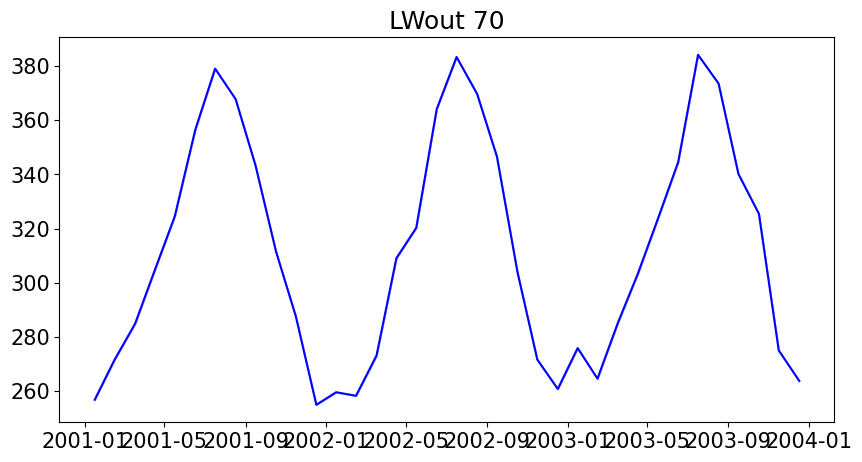

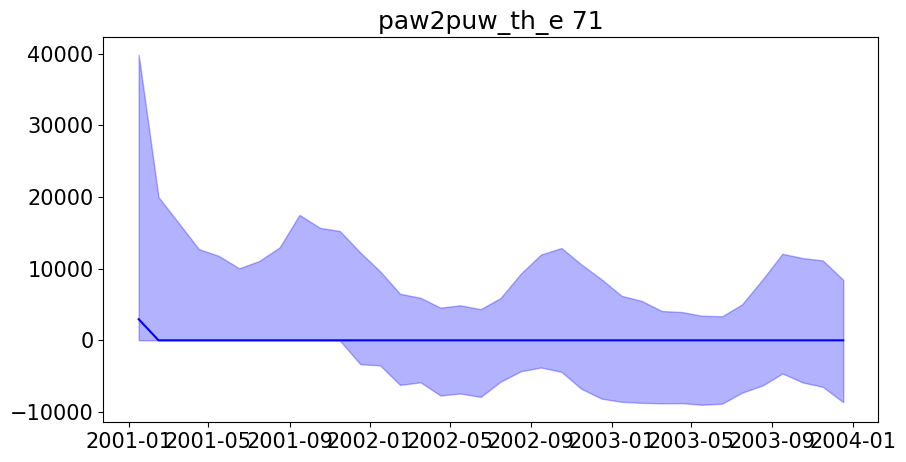

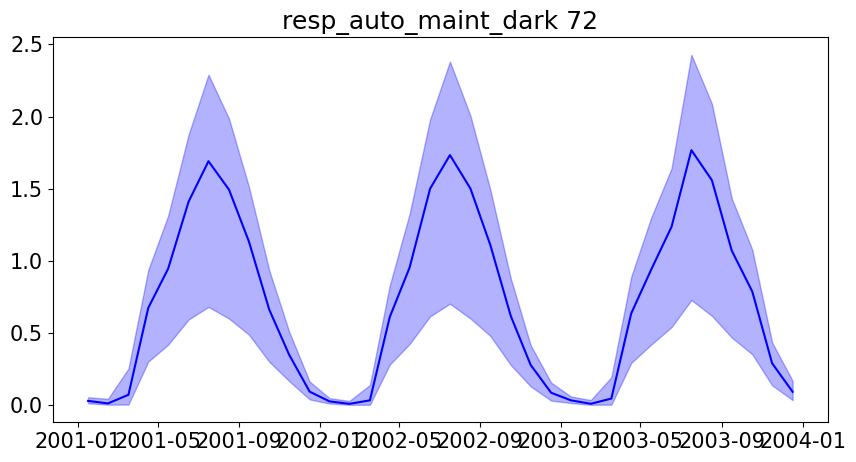

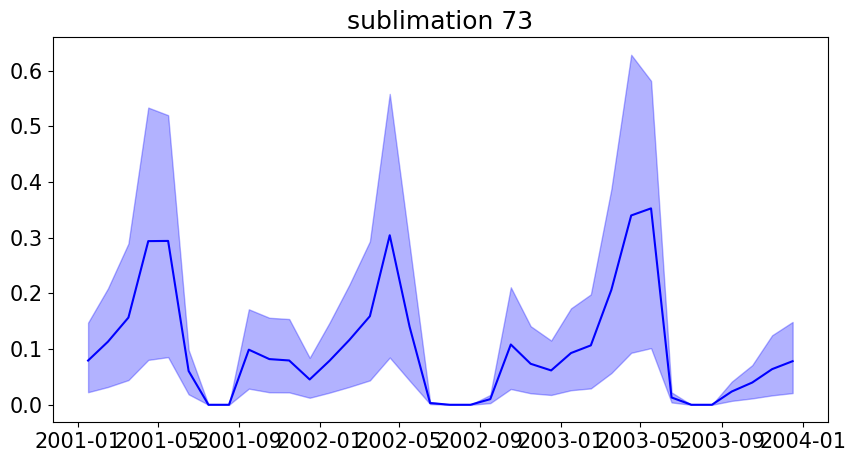

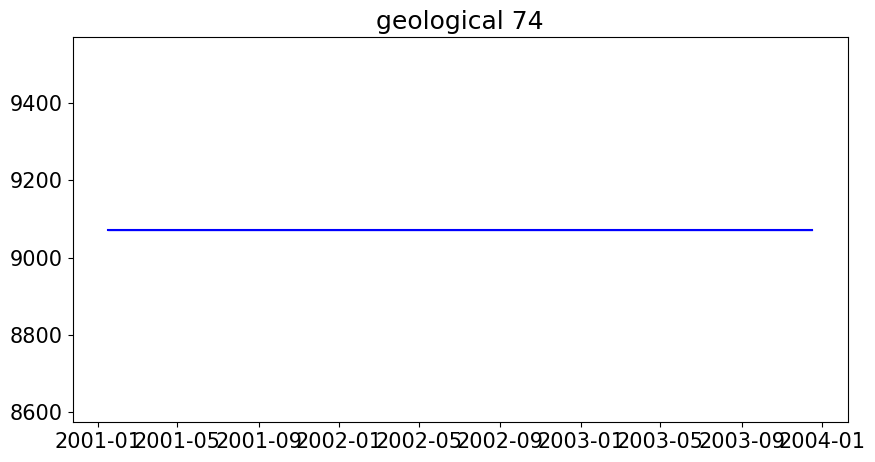

In [8]:

fluxinfo = prt.flux_info(c_loc,int(cbf["ID"][:]))

#plot median of DALEC ensambles as well as 25th and 75th percentile
for a in fluxinfo.keys():
    plt.figure(figsize = (10,5))
    plt.title(fluxinfo[a] + " " + str(a))
    plt.plot(dates,np.median(Fluxes[:,:,a],axis = 0),color = 'blue')
    SDist = np.percentile(Fluxes[:,:,a],[25,75],axis = 0)
    plt.fill_between(dates, SDist[0,:], SDist[-1,:], color="blue", alpha=.3)

plt.show()


## Plot DAELC Pools from optimal paramaters

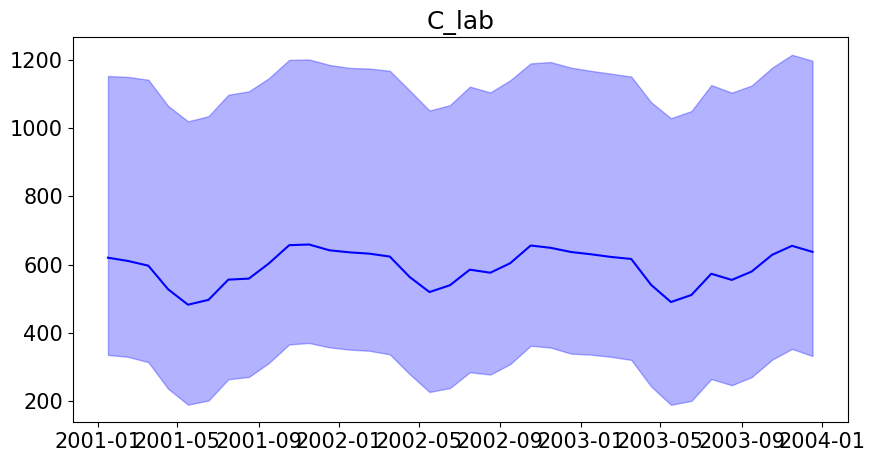

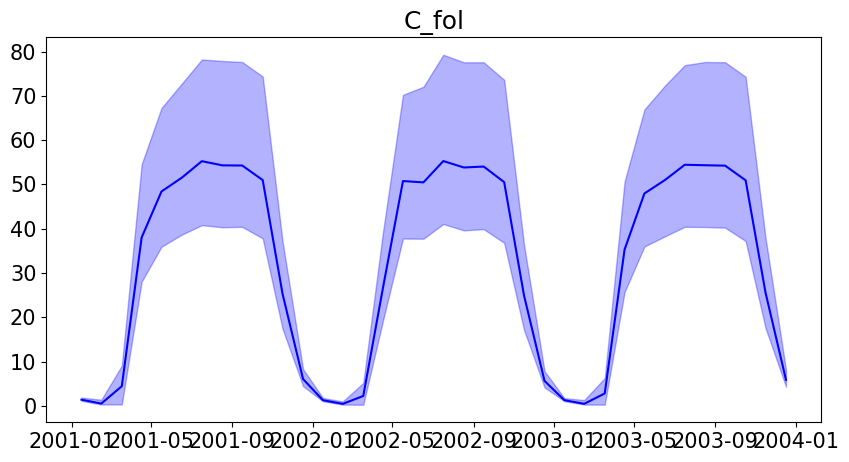

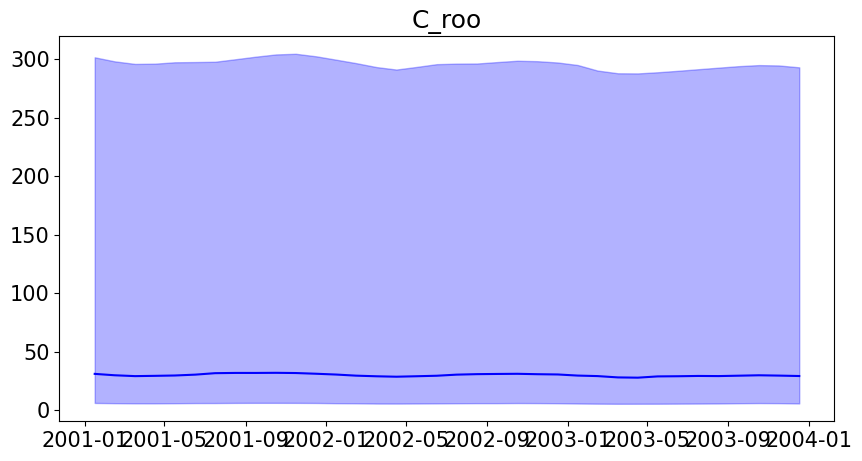

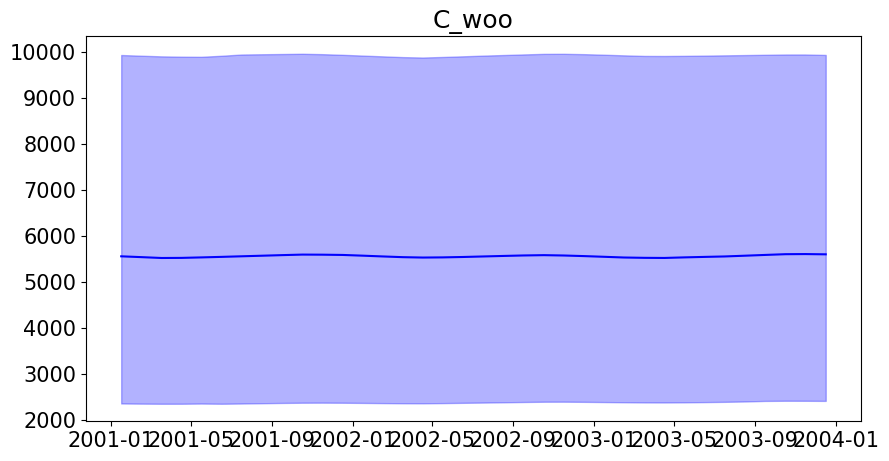

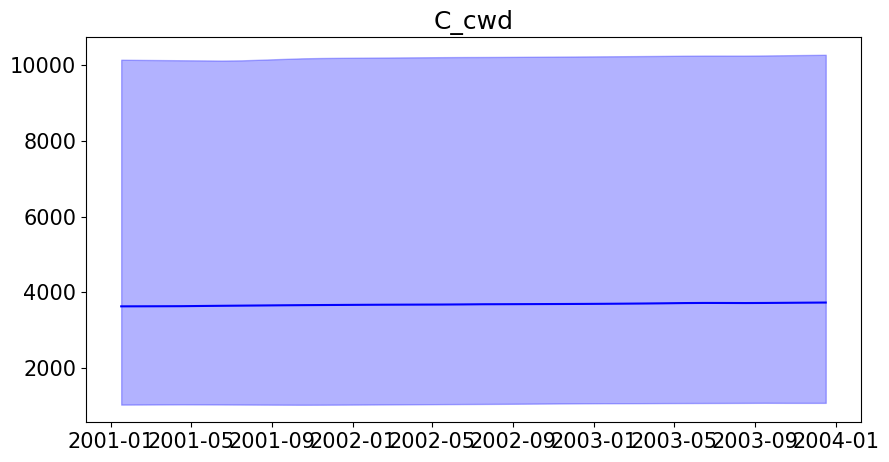

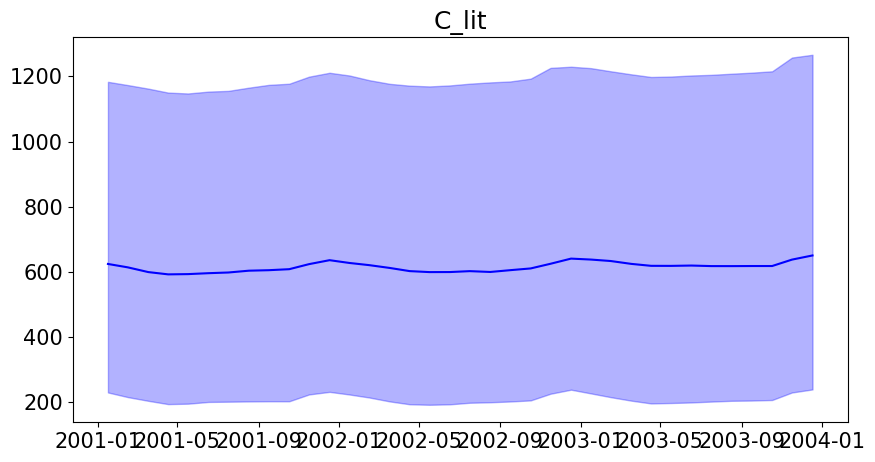

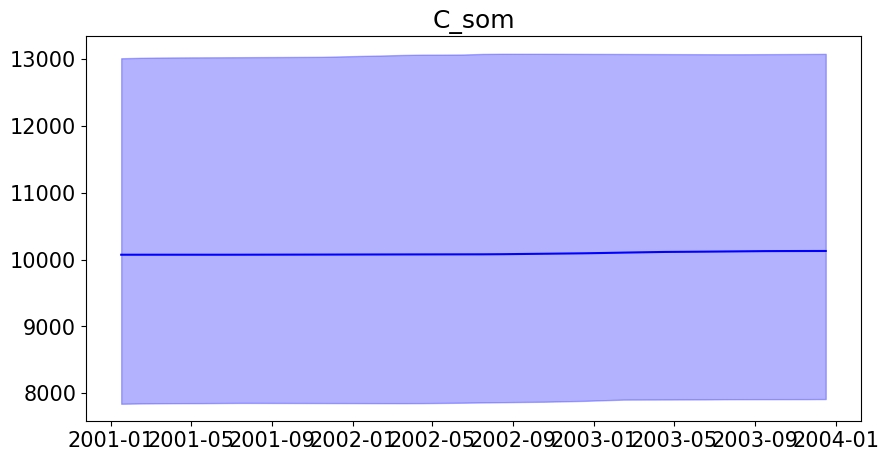

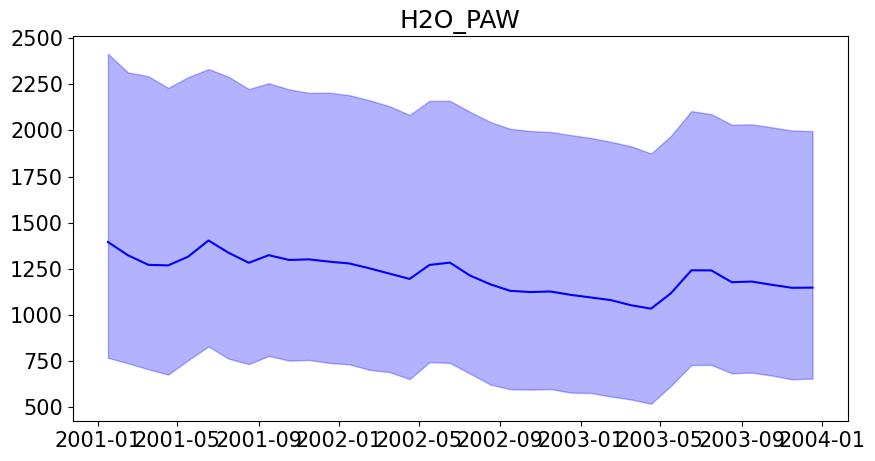

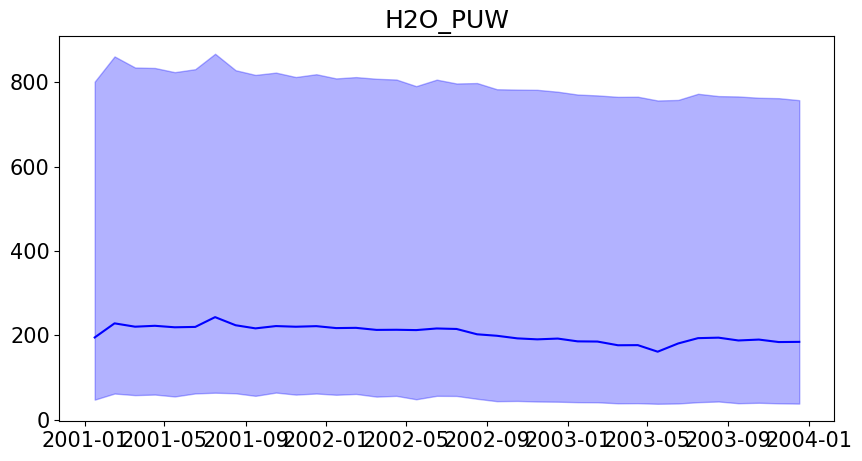

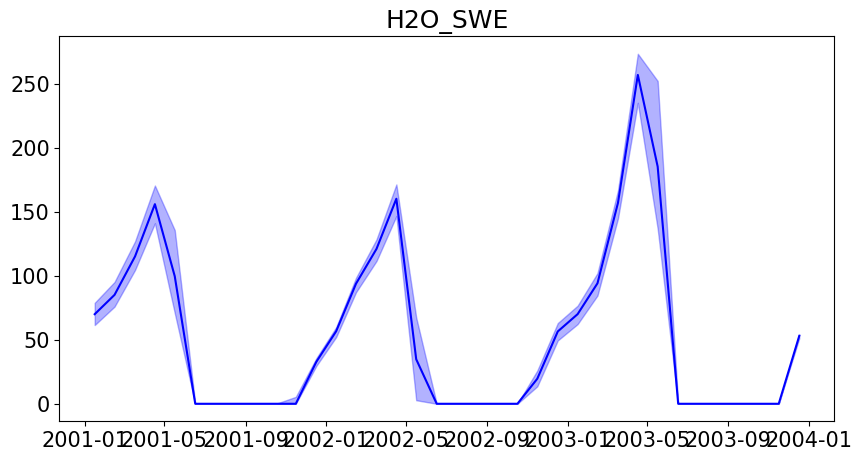

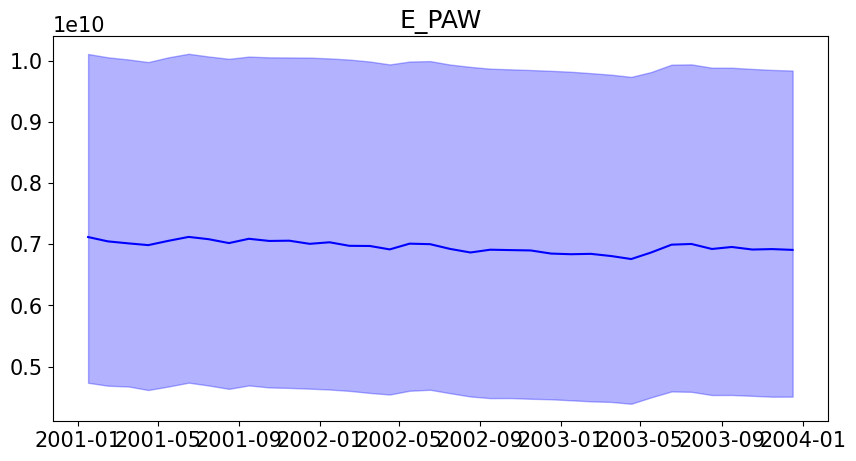

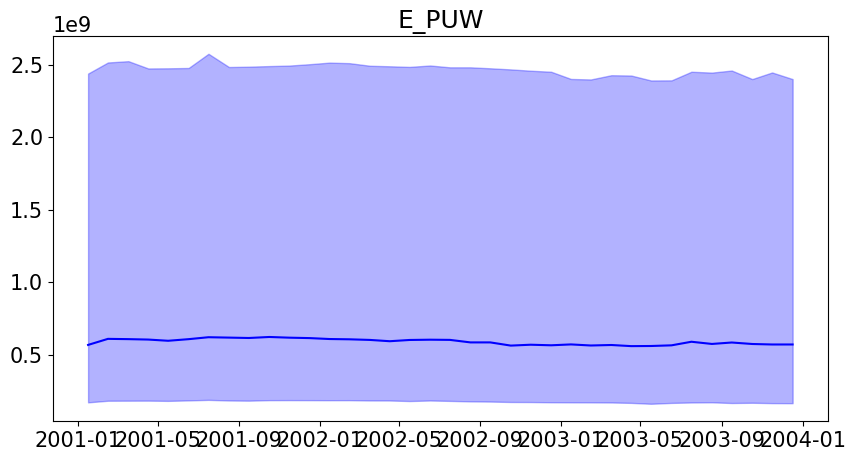

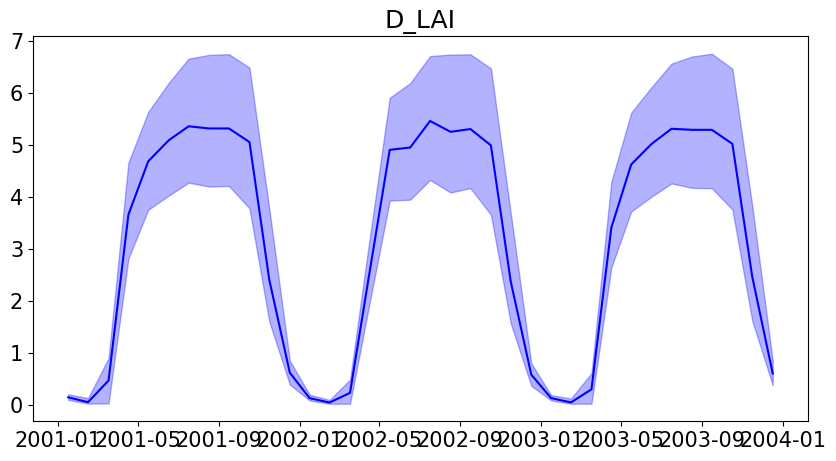

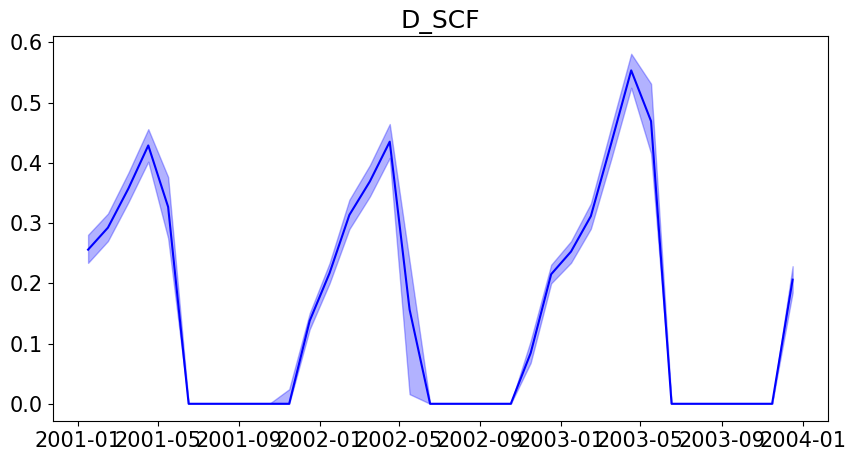

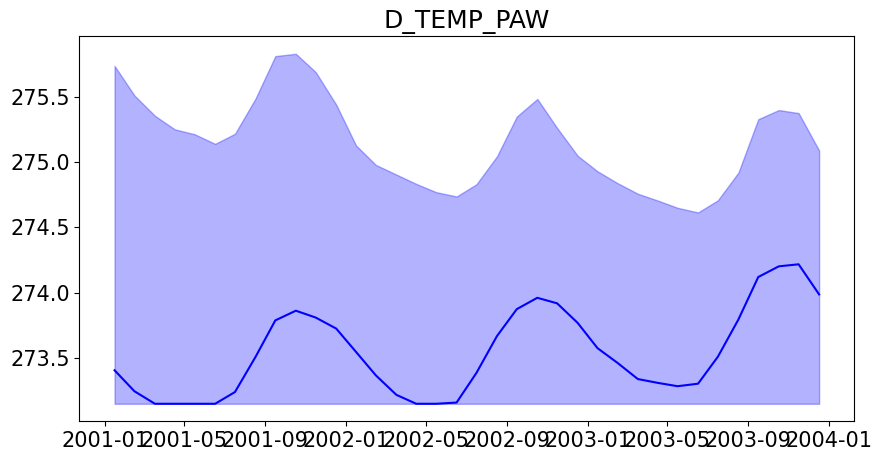

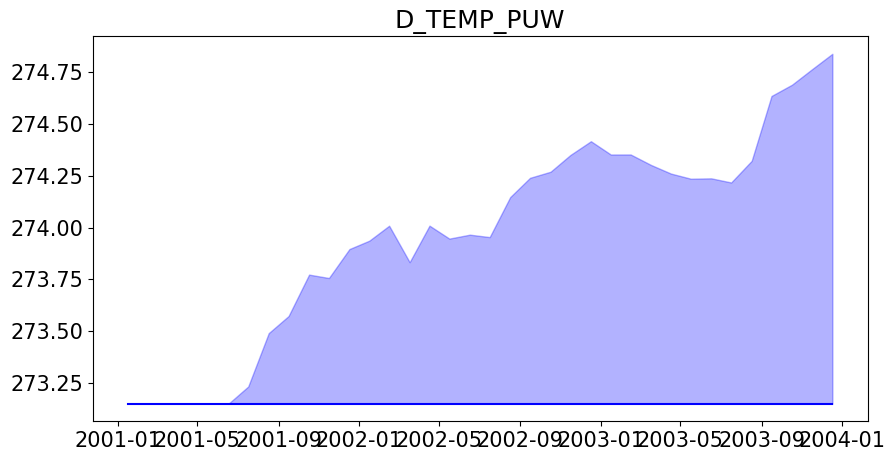

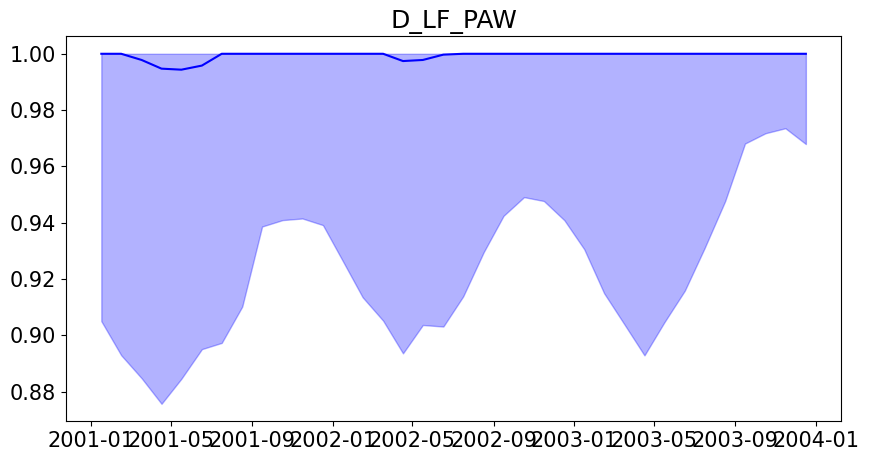

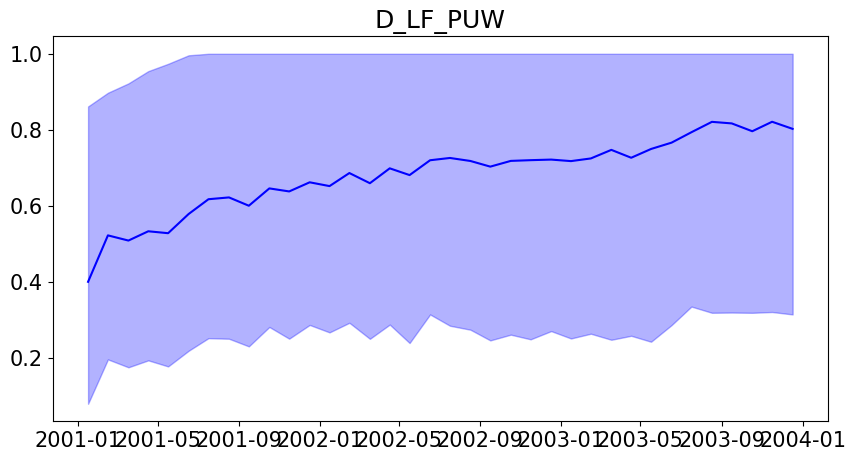

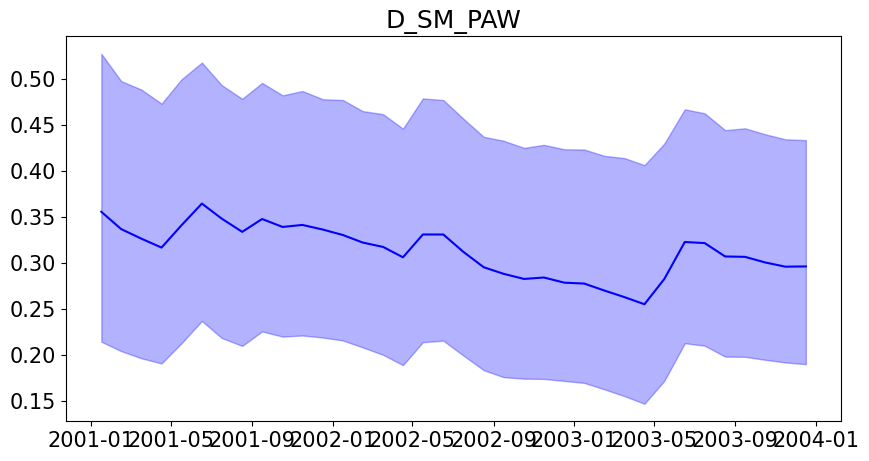

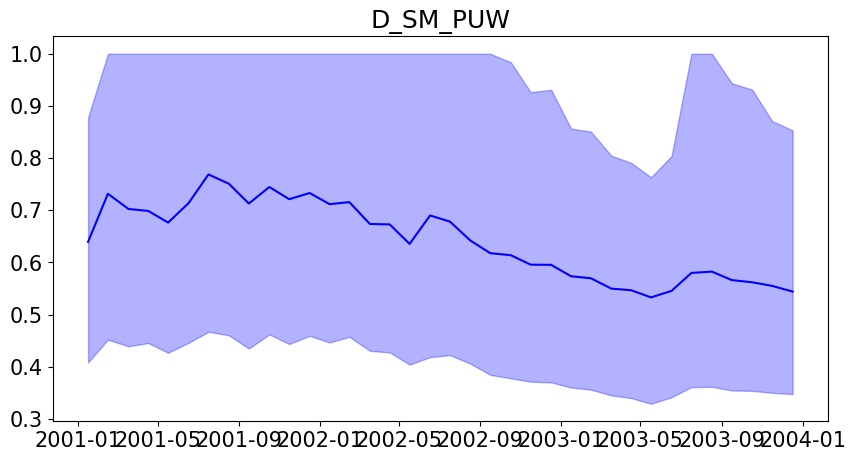

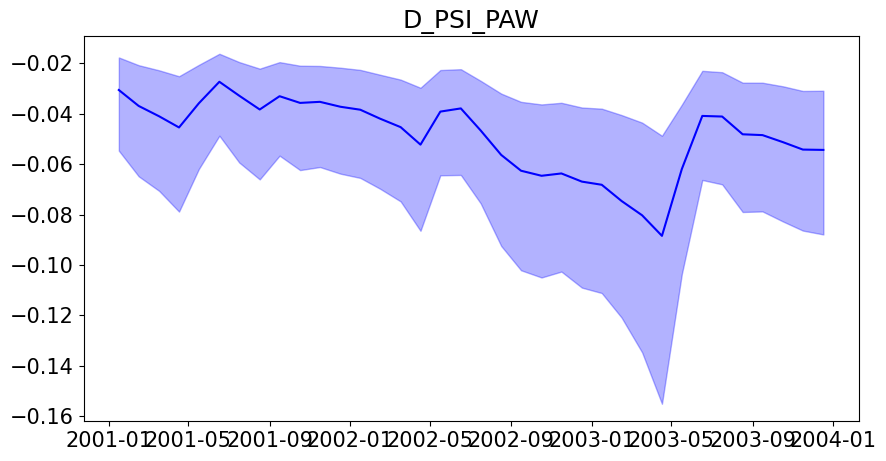

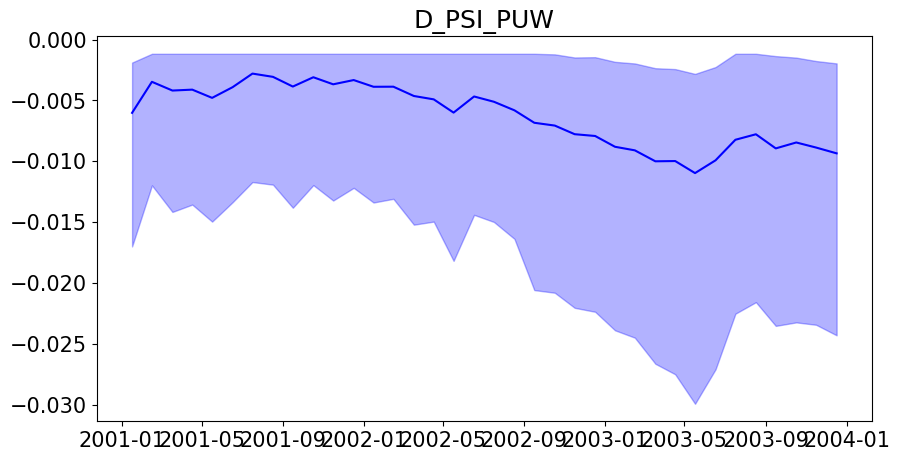

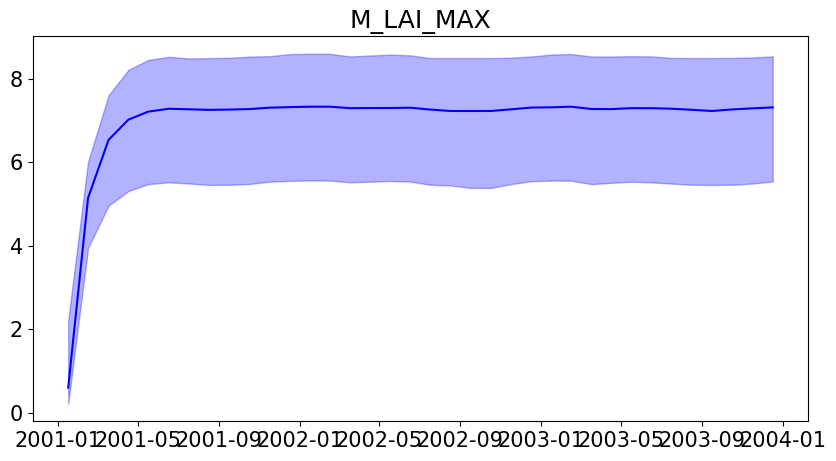

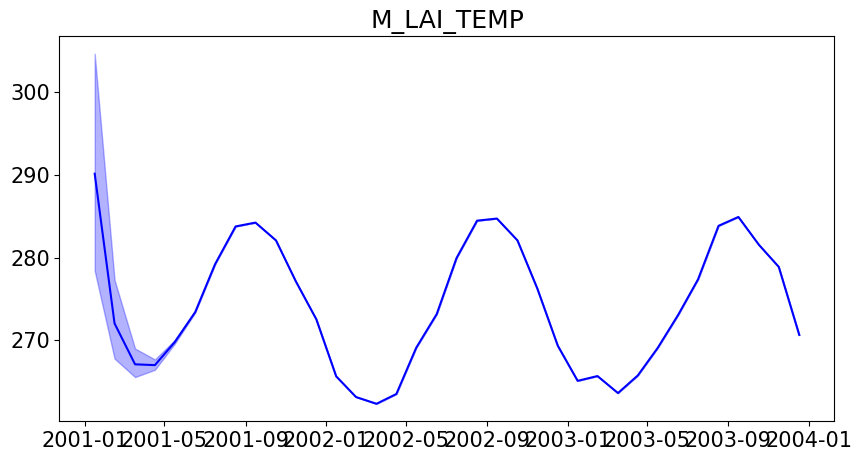

In [9]:

poolinfo = prt.pool_info(c_loc,int(cbf["ID"][:]))

for a in poolinfo.keys():
    plt.figure(figsize = (10,5))
    plt.title(poolinfo[a])
    plt.plot(dates,np.median(Pools[:,:,a],axis = 0)[0:-1],color = 'blue')
    SDist = np.percentile(Pools[:,:,a],[25,75],axis = 0)
    plt.fill_between(dates, SDist[0,0:-1], SDist[-1,0:-1], color="blue", alpha=.3)

plt.show()

In [10]:
cbf.close() #close the cbf file